# 0. Introduction

In this notebook, I will go through my solution and analysis of the [Kaggle Titanic survival prediction competition](https://www.kaggle.com/c/titanic/overview). The aim of this competition is simple, given what we know about a passenger aboard the Titanic, can we predict whether or not this passenger has survived? In other words, we want to train a machine learning model to learn the relationship between passenger features and their survival outcome and subsequently make survival predictions on passenger data that our model has not seen before.

This is a classic beginner's project suited for anyone who is looking to gain some hands-on experience with data science and machine learning. I hope you will find some value out of this notebook.

I drew inspirations from the following notebooks in the making of this notebook:
- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions) by [Manav Sehgal](https://www.kaggle.com/startupsci)
- [Titanic Top 4% With Emsemble Modelling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling) by [Yassin Ghouzam](https://www.kaggle.com/yassineghouzam)
    
Kaggle competitions comprise of a minimum of 3 datasets that you can find and download from the competition webpage. The three datasets are:

1. Training set
2. Test set 
3. Sample submission

## Training set
This is the dataset that you will be working on predominantly. You will perform manipulation and analysis on this dataset to extract insights as well as build a predictive model. The goal here is to determine and create features that will help us predict the outcome of our data. There are two types of problems in machine learning and they are classfication and regression problems. Titanic is an example of a classification problem where the outcome is categorical. In other words, our model needs to be able to predict and classify outcomes as either one of two categories, survived or did not survive the titanic.

## Test set
Once our model has been built, we need to make sure that it does not merely fit our training set well but also able to make predictions on out-of-samples data, that is data our model has not been trained on. We will use the testing set as inputs to the model that we have built and make predictions based on those inputs. This is where you will be assessed in the competition i.e. how accurate is your model at predicting new observations. It is also important to note that every competition has different metrics in which they assess model accuracy and you can find this information under the evaluation tab in the overview section of the competition page. For this competition, the evaluation metric is simply the percentage of passengers that are correctly predicted by our model.

## Sample submission
This is the format in which you want to submit your final solution. Pay attention to the column headings and shape of the sample submission to get a better understanding on how you should structure your final dataframe for submission.

# 1. Import libraries

Here I will import the libraries that I will be using in my notebook. Libraries are essentially extensions to Python that consist of functions that are handy to have when we are performing our analysis. 

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data

Now import and read the 3 datasets as outlined in the introduction.

In [2]:
train = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/titanic/train.csv")
test = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/titanic/test.csv")
ss = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/titanic/gender_submission.csv")

Let's have a look at the datasets.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


Note that the test set has one column less than training set, the Survived column. This is because Survived is our response variable, or sometimes called a target variable. Our job is to analyse the data in the training set and predict the survival of the passengers in the test set.

What about sample submission?

In [6]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
ss.shape

(418, 2)

So, our final dataframe that is to be submitted should look something like this, 418 rows and 2 columns, one for PassengerId and one for Survived.

# 3. Data description

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the [data](https://www.kaggle.com/c/titanic/data) tab of the competition page.

- Survived: 0 = Did not survive, 1 = Survived

- Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

- Sex: Male or female

- Age: Age in years, fractional if less than 1

- SibSp: Number of siblings or spouses aboard the titanic

- Parch: Number of parents or children aboard the titanic

- Ticket: Passenger ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

# 4. Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

## 4.1 Data types, missing data and summary statistics

In [8]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [9]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [10]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

Seems like Age, Cabin and Embarked colummns in the training set have missing data  while Age, Fare and Cabin in the test set have missing data. Another way to to diagnose this is via the missingno library.

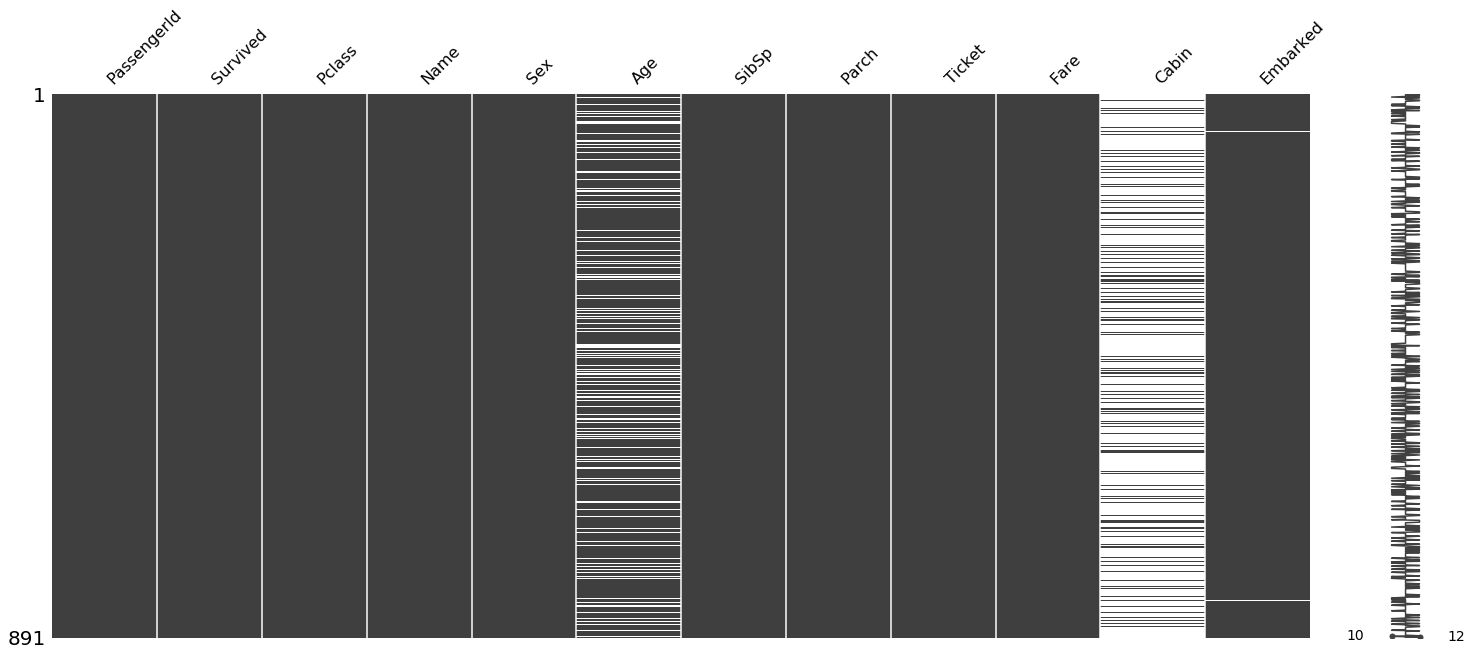

In [11]:
# Missing data in training set

missingno.matrix(train)

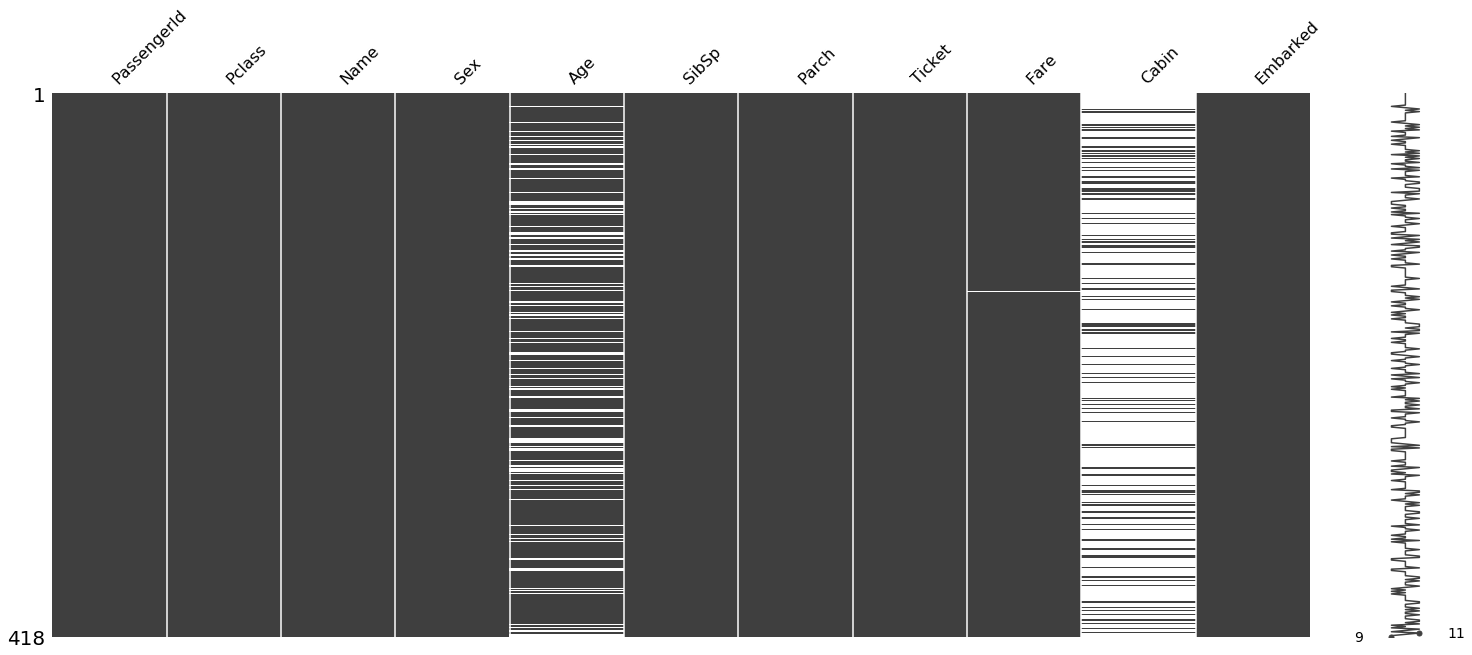

In [12]:
# Missing data in test set 

missingno.matrix(test)

In [13]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Summary statistics for test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4.2 Feature analysis

A dataframe is made up of rows and columns. Number of rows correspond to the number of observations in our dataset whereas columns, sometimes called features, represent characteristics that help describe these observations. In our dataset, rows are the passengers on the titanic whereas columns are the features that describe the passengers like their age, gender etc.

Before we move on, it is also important to note the difference between a categorical variable and a numerical variable. Categorical variables, as the name suggests, have values belonging to one of two or more categories and there is usually no intrinsic ordering to these categories. An example of this in our data is the Sex feature. Every passenger is distinctly classified as either male or female. Numerical variables, on the other hand, have a continuous distribution. Some examples of numerical variables are the Age and Fare features.

Knowing if a feature is a numerical variable or categorical variable helps us structure our analysis more properly. For instance, it doesn't make sense to calculate the average of a categorical variable such as gender simply because gender is a binary classification and therefore has no intrinsic ordering to its values.

In this next section of the notebook, we will analyse the features in our dataset individually and see how they correlate with survival probability.

## 4.2.1 Categorical variables

Categorical variables in our dataset are Sex, Pclass and Embarked.

## Categorical variable: Sex

In [15]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

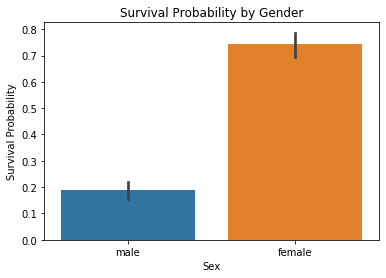

In [17]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

## Categorical variable: Pclass

In [18]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

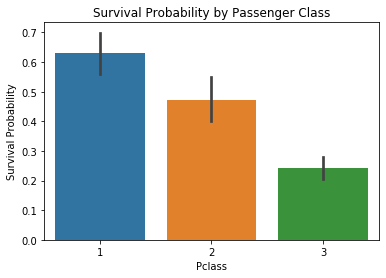

In [20]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1, 'Survival Probability by Sex and Passenger Class')

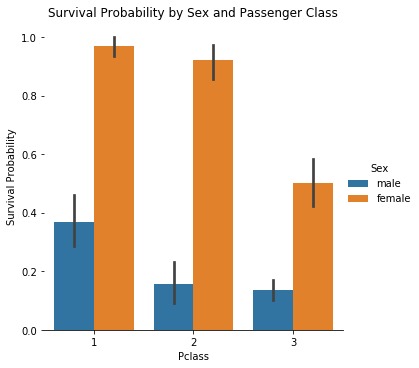

In [21]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

## Categorical variable: Embarked

In [22]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [23]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

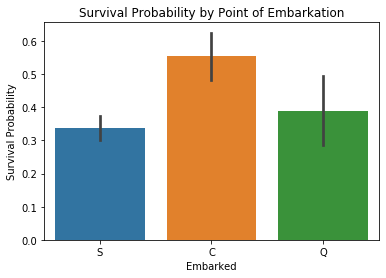

In [24]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

Let us now test this hypothesis.

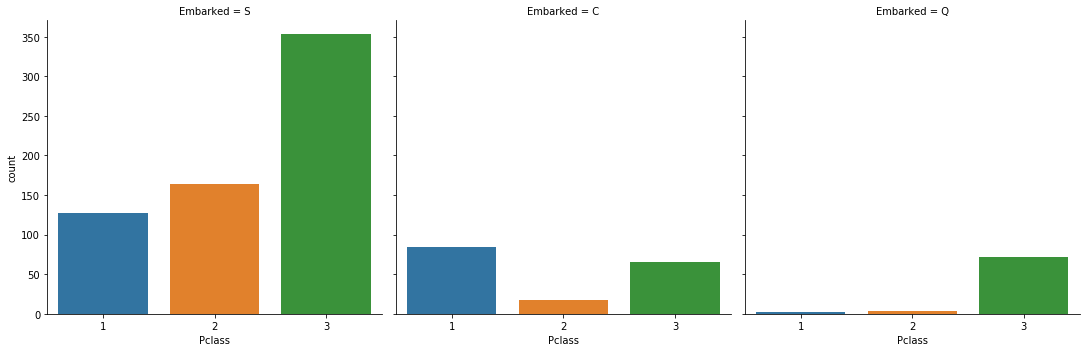

In [25]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

Our hypothesis appears to be true. Location S has the most third class passengers whereas location C has the most first class passengers. 

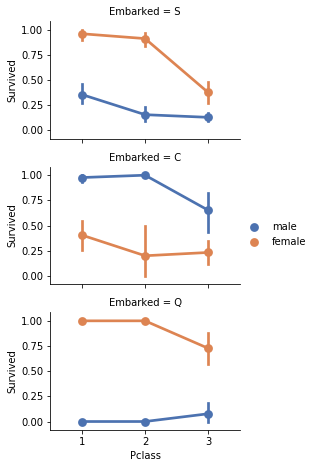

In [26]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

## 4.2.2 Numerical variables

Numerical variables in our dataset are SibSp, Parch, Age and Fare.

## Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

In [27]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [28]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [29]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


## Numerical variables correlation with survival

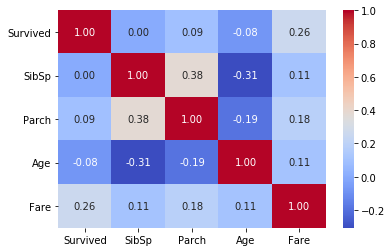

In [30]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

## Numerical variable: SibSp

In [31]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [32]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

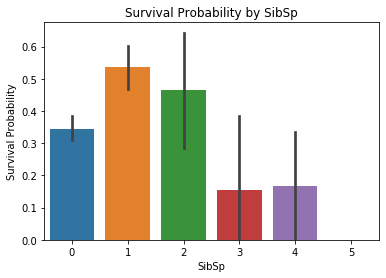

In [33]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

## Numerical variable: Parch

In [34]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

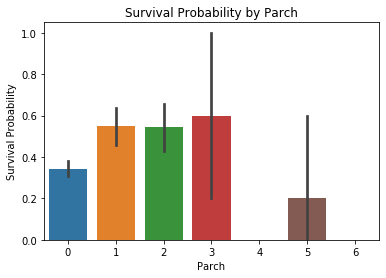

In [36]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

## Numerical variable: Age

In [37]:
# Null values in Age column 

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

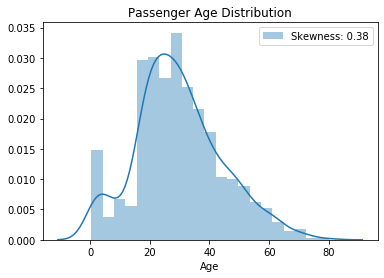

In [38]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

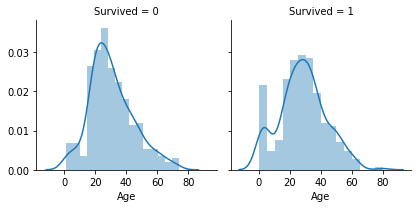

In [39]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

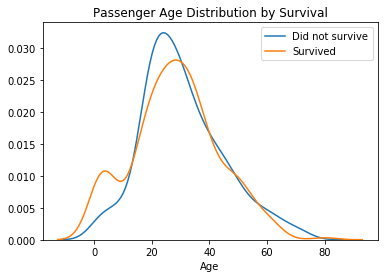

In [40]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

## Numerical variable: Fare

In [41]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

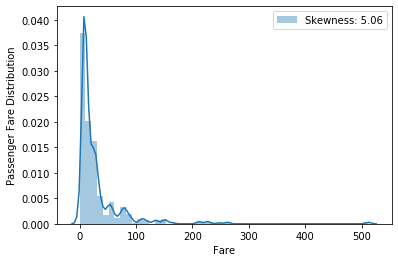

In [42]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

Fare seems to have a high skewness. We will address this issue later on in the notebook via log transformation. 

# 5. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

## 5.1 Drop and fill missing values

In [43]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

I have decided to drop both ticket and cabin for simplicity of this tutorial but if you have the time, I would recommend going through them and see if they can help improve your model.

In [44]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [45]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [46]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [47]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
Embarked        0
Parch           0
SibSp           0
Sex             0
Name            0
Pclass          0
PassengerId     0
dtype: int64

In [48]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [49]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [50]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [51]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
Embarked         0
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

We can ignore missing values in the Survived column because all of them are from the test set. Now we need to fill missing values in the Age column.

The goal is to use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female. This process is known as encoding and we will further explore this later in the notebook.

In [52]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

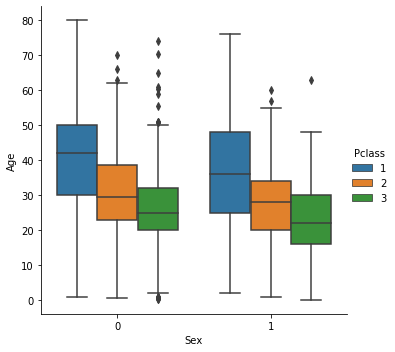

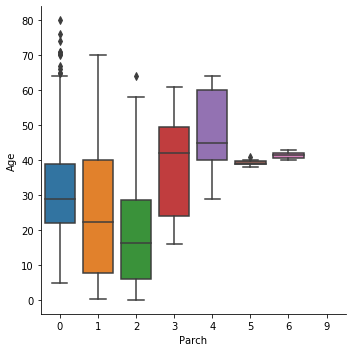

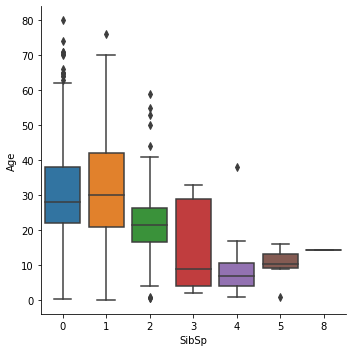

In [53]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

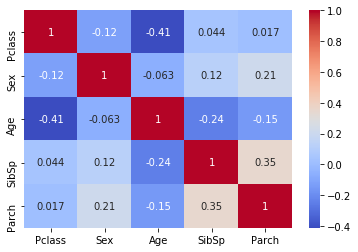

In [54]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

Age is not correlated with Sex but is negatively correlated with SibSp, Parch and Pclass. 

In [55]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

Loop through each missing age in the list to locate the rows that have the same SibSp, Parch and PClass values and fill the missing age with the median of those rows. If rows are not found, simply fill the missing age with the median of the entire Age column.

In [56]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [57]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

## 5.2 Data transformation

Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

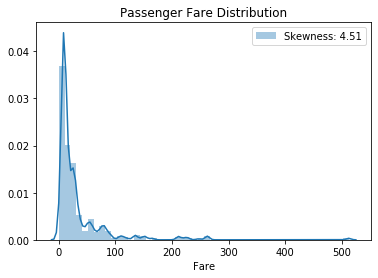

In [58]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [59]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

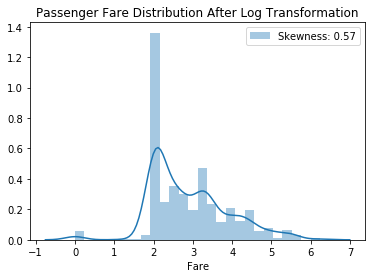

In [60]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## 5.3 Feature engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

In this section, I will construct 3 new features:
- Title
- IsAlone
- Age*Class

## 5.3.1 Title

In [61]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [62]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [63]:
# Value counts of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Lady              1
the Countess      1
Mme               1
Sir               1
Dona              1
Don               1
Jonkheer          1
Capt              1
Name: Title, dtype: int64

In [64]:
# Number of unique Title

combine['Title'].nunique()

18

In [65]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

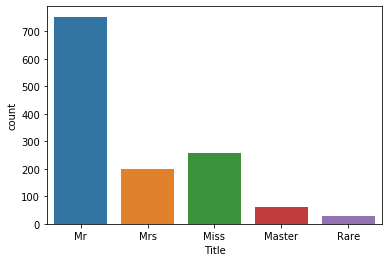

In [66]:
sns.countplot(combine['Title'])

In [67]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1, 'Mean of survival by Title')

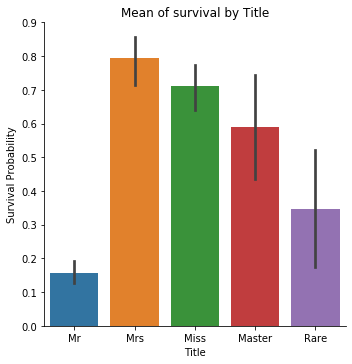

In [68]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [69]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


## 5.3.2 IsAlone

In [70]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [71]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [72]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [73]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [74]:
# Drop SibSp, Parch and FamilySize featurs from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


## 5.3.3 Age*Class

To create our new Age*Class feature, we need to first transform Age into an ordinal variable. Ordinal variable is much like a categorical variable but with intrisinc ordering in their values. 

We will group Ages into 5 separate age bands and assign a number to each age band.

In [75]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [76]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [77]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [78]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [79]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [80]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## 5.4 Feature encoding 

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the data to our models.

Previously, we have encoded the sex column such that 0 = female and 1 = male. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.

In [81]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [82]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [83]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [84]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [85]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [86]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [87]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [88]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [89]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [90]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [91]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [92]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [93]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


Our dataframes are ready for modelling!

# 6. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project. 

Since titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our data and make predictions. I highly recommend checking out this scikit-learn [documentation](https://scikit-learn.org/stable/index.html) for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

- Logistic regression
- Support vector machines
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost

In this section of the notebook, I will fit the training set to the models outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

## 6.1 Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [94]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


## 6.2 Fit data to model and make predictions

This requires 3 simple steps: instantiate the model, fit the training data to the training set, predict the test set. 

## 6.2.1 Logistic regression

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

## 6.2.2 Support vector machines

In [96]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

## 6.2.3 K-nearest neighbours (KNN)

In [97]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.79

## 6.2.4 Gaussian naive bayes

In [98]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

## 6.2.5 Perceptron

In [99]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

## 6.2.6 Linear SVC

In [100]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.48

## 6.2.7 Stochastic gradient descent

In [101]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.64

## 6.2.8 Decision tree

In [102]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

## 6.2.9 Random forest

In [103]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

## 6.2.10 CatBoost

In [104]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6871228	total: 155ms	remaining: 2m 34s
1:	learn: 0.6801574	total: 159ms	remaining: 1m 19s
2:	learn: 0.6732637	total: 164ms	remaining: 54.6s
3:	learn: 0.6672910	total: 168ms	remaining: 41.9s
4:	learn: 0.6611084	total: 175ms	remaining: 34.8s
5:	learn: 0.6555569	total: 180ms	remaining: 29.8s
6:	learn: 0.6501811	total: 185ms	remaining: 26.2s
7:	learn: 0.6441823	total: 190ms	remaining: 23.6s
8:	learn: 0.6402135	total: 193ms	remaining: 21.3s
9:	learn: 0.6349168	total: 198ms	remaining: 19.6s
10:	learn: 0.6297361	total: 203ms	remaining: 18.3s
11:	learn: 0.6258520	total: 207ms	remaining: 17.1s
12:	learn: 0.6202912	total: 211ms	remaining: 16s
13:	learn: 0.6160007	total: 216ms	remaining: 15.2s
14:	learn: 0.6109708	total: 220ms	remaining: 14.5s
15:	learn: 0.6057145	total: 225ms	remaining: 13.8s
16:	learn: 0.6022326	total: 228ms	remaining: 13.2s
17:	learn: 0.5977868	total: 232ms	remaining: 12.7s
18:	learn: 0.5930687	total: 237ms	remaining: 12.2s
19:	learn: 0

166:	learn: 0.3912990	total: 896ms	remaining: 4.47s
167:	learn: 0.3908674	total: 901ms	remaining: 4.46s
168:	learn: 0.3906557	total: 905ms	remaining: 4.45s
169:	learn: 0.3904884	total: 910ms	remaining: 4.44s
170:	learn: 0.3902092	total: 914ms	remaining: 4.43s
171:	learn: 0.3899393	total: 919ms	remaining: 4.42s
172:	learn: 0.3897106	total: 923ms	remaining: 4.41s
173:	learn: 0.3894497	total: 928ms	remaining: 4.4s
174:	learn: 0.3891655	total: 932ms	remaining: 4.39s
175:	learn: 0.3888350	total: 937ms	remaining: 4.38s
176:	learn: 0.3886259	total: 941ms	remaining: 4.37s
177:	learn: 0.3883281	total: 946ms	remaining: 4.37s
178:	learn: 0.3880114	total: 950ms	remaining: 4.36s
179:	learn: 0.3878231	total: 956ms	remaining: 4.36s
180:	learn: 0.3876306	total: 961ms	remaining: 4.35s
181:	learn: 0.3872532	total: 966ms	remaining: 4.34s
182:	learn: 0.3869712	total: 971ms	remaining: 4.33s
183:	learn: 0.3866999	total: 975ms	remaining: 4.33s
184:	learn: 0.3864887	total: 980ms	remaining: 4.32s
185:	learn: 0

340:	learn: 0.3645355	total: 1.65s	remaining: 3.19s
341:	learn: 0.3644484	total: 1.66s	remaining: 3.19s
342:	learn: 0.3644052	total: 1.66s	remaining: 3.18s
343:	learn: 0.3643244	total: 1.67s	remaining: 3.17s
344:	learn: 0.3641807	total: 1.67s	remaining: 3.17s
345:	learn: 0.3640604	total: 1.67s	remaining: 3.16s
346:	learn: 0.3639664	total: 1.68s	remaining: 3.16s
347:	learn: 0.3638234	total: 1.68s	remaining: 3.15s
348:	learn: 0.3637154	total: 1.69s	remaining: 3.15s
349:	learn: 0.3635791	total: 1.69s	remaining: 3.14s
350:	learn: 0.3634654	total: 1.7s	remaining: 3.14s
351:	learn: 0.3634068	total: 1.7s	remaining: 3.13s
352:	learn: 0.3632829	total: 1.71s	remaining: 3.13s
353:	learn: 0.3632511	total: 1.71s	remaining: 3.12s
354:	learn: 0.3631089	total: 1.72s	remaining: 3.12s
355:	learn: 0.3630196	total: 1.72s	remaining: 3.11s
356:	learn: 0.3630138	total: 1.72s	remaining: 3.1s
357:	learn: 0.3629282	total: 1.73s	remaining: 3.1s
358:	learn: 0.3628617	total: 1.73s	remaining: 3.09s
359:	learn: 0.36

508:	learn: 0.3524077	total: 2.4s	remaining: 2.32s
509:	learn: 0.3523511	total: 2.41s	remaining: 2.31s
510:	learn: 0.3523363	total: 2.41s	remaining: 2.31s
511:	learn: 0.3522963	total: 2.42s	remaining: 2.3s
512:	learn: 0.3522142	total: 2.42s	remaining: 2.3s
513:	learn: 0.3521306	total: 2.43s	remaining: 2.29s
514:	learn: 0.3521246	total: 2.43s	remaining: 2.29s
515:	learn: 0.3521214	total: 2.44s	remaining: 2.28s
516:	learn: 0.3521202	total: 2.44s	remaining: 2.28s
517:	learn: 0.3520905	total: 2.44s	remaining: 2.27s
518:	learn: 0.3520881	total: 2.45s	remaining: 2.27s
519:	learn: 0.3520019	total: 2.45s	remaining: 2.26s
520:	learn: 0.3519898	total: 2.45s	remaining: 2.26s
521:	learn: 0.3519169	total: 2.46s	remaining: 2.25s
522:	learn: 0.3518493	total: 2.46s	remaining: 2.25s
523:	learn: 0.3518482	total: 2.47s	remaining: 2.24s
524:	learn: 0.3518275	total: 2.47s	remaining: 2.23s
525:	learn: 0.3517441	total: 2.48s	remaining: 2.23s
526:	learn: 0.3517181	total: 2.48s	remaining: 2.22s
527:	learn: 0.3

675:	learn: 0.3450065	total: 3.14s	remaining: 1.5s
676:	learn: 0.3449800	total: 3.14s	remaining: 1.5s
677:	learn: 0.3449520	total: 3.15s	remaining: 1.49s
678:	learn: 0.3448837	total: 3.15s	remaining: 1.49s
679:	learn: 0.3448566	total: 3.15s	remaining: 1.48s
680:	learn: 0.3448305	total: 3.16s	remaining: 1.48s
681:	learn: 0.3448305	total: 3.16s	remaining: 1.47s
682:	learn: 0.3448267	total: 3.16s	remaining: 1.47s
683:	learn: 0.3448055	total: 3.17s	remaining: 1.46s
684:	learn: 0.3447771	total: 3.17s	remaining: 1.46s
685:	learn: 0.3447668	total: 3.18s	remaining: 1.45s
686:	learn: 0.3447289	total: 3.18s	remaining: 1.45s
687:	learn: 0.3447210	total: 3.18s	remaining: 1.44s
688:	learn: 0.3446983	total: 3.19s	remaining: 1.44s
689:	learn: 0.3446457	total: 3.19s	remaining: 1.43s
690:	learn: 0.3445576	total: 3.2s	remaining: 1.43s
691:	learn: 0.3445501	total: 3.2s	remaining: 1.42s
692:	learn: 0.3445042	total: 3.2s	remaining: 1.42s
693:	learn: 0.3444558	total: 3.21s	remaining: 1.42s
694:	learn: 0.344

842:	learn: 0.3383943	total: 3.89s	remaining: 725ms
843:	learn: 0.3383366	total: 3.9s	remaining: 721ms
844:	learn: 0.3382877	total: 3.9s	remaining: 716ms
845:	learn: 0.3382673	total: 3.91s	remaining: 711ms
846:	learn: 0.3382244	total: 3.91s	remaining: 707ms
847:	learn: 0.3381949	total: 3.92s	remaining: 703ms
848:	learn: 0.3381392	total: 3.93s	remaining: 698ms
849:	learn: 0.3380987	total: 3.93s	remaining: 694ms
850:	learn: 0.3380401	total: 3.94s	remaining: 689ms
851:	learn: 0.3379959	total: 3.94s	remaining: 685ms
852:	learn: 0.3379842	total: 3.95s	remaining: 680ms
853:	learn: 0.3379502	total: 3.95s	remaining: 675ms
854:	learn: 0.3378949	total: 3.96s	remaining: 671ms
855:	learn: 0.3378697	total: 3.96s	remaining: 666ms
856:	learn: 0.3378306	total: 3.97s	remaining: 662ms
857:	learn: 0.3377731	total: 3.98s	remaining: 658ms
858:	learn: 0.3377339	total: 3.98s	remaining: 653ms
859:	learn: 0.3376792	total: 3.99s	remaining: 649ms
860:	learn: 0.3376500	total: 3.99s	remaining: 645ms
861:	learn: 0.

In [105]:
acc_catboost

85.7

## 6.3 Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

## 6.3.1 Training accuracy

Training accuracy shows how well our model has learned from the training set. 

In [106]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.79
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.48
7,Perceptron,79.57
8,Naive Bayes,79.11
9,Stochastic Gradient Decent,77.64


## 6.3.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [107]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [108]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870194	total: 5.16ms	remaining: 5.15s
1:	learn: 0.6803219	total: 9.75ms	remaining: 4.86s
2:	learn: 0.6736531	total: 13.9ms	remaining: 4.62s
3:	learn: 0.6678130	total: 17.6ms	remaining: 4.38s
4:	learn: 0.6618130	total: 21.8ms	remaining: 4.34s
5:	learn: 0.6563633	total: 25.6ms	remaining: 4.24s
6:	learn: 0.6509528	total: 31.6ms	remaining: 4.48s
7:	learn: 0.6449930	total: 37.9ms	remaining: 4.7s
8:	learn: 0.6411853	total: 41.6ms	remaining: 4.58s
9:	learn: 0.6366148	total: 45.5ms	remaining: 4.5s
10:	learn: 0.6321141	total: 50.4ms	remaining: 4.53s
11:	learn: 0.6282605	total: 54.8ms	remaining: 4.51s
12:	learn: 0.6236975	total: 58.5ms	remaining: 4.44s
13:	learn: 0.6184334	total: 64.2ms	remaining: 4.52s
14:	learn: 0.6132588	total: 70ms	remaining: 4.6s
15:	learn: 0.6105914	total: 74.2ms	remaining: 4.57s
16:	learn: 0.6060713	total: 79.3ms	remaining: 4.58s
17:	learn: 0.6013206	total: 83.4ms	remaining: 4.55s
18:	learn: 0.5966578	total: 88.9ms	remaining: 4.5

186:	learn: 0.3838640	total: 873ms	remaining: 3.8s
187:	learn: 0.3835612	total: 878ms	remaining: 3.79s
188:	learn: 0.3832816	total: 883ms	remaining: 3.79s
189:	learn: 0.3830177	total: 888ms	remaining: 3.78s
190:	learn: 0.3826469	total: 892ms	remaining: 3.78s
191:	learn: 0.3825702	total: 895ms	remaining: 3.77s
192:	learn: 0.3822077	total: 900ms	remaining: 3.76s
193:	learn: 0.3818039	total: 904ms	remaining: 3.75s
194:	learn: 0.3816018	total: 908ms	remaining: 3.75s
195:	learn: 0.3812526	total: 912ms	remaining: 3.74s
196:	learn: 0.3809560	total: 916ms	remaining: 3.73s
197:	learn: 0.3806978	total: 921ms	remaining: 3.73s
198:	learn: 0.3804248	total: 925ms	remaining: 3.72s
199:	learn: 0.3801607	total: 928ms	remaining: 3.71s
200:	learn: 0.3799714	total: 933ms	remaining: 3.71s
201:	learn: 0.3797328	total: 937ms	remaining: 3.7s
202:	learn: 0.3795058	total: 941ms	remaining: 3.69s
203:	learn: 0.3792660	total: 945ms	remaining: 3.69s
204:	learn: 0.3790106	total: 949ms	remaining: 3.68s
205:	learn: 0.

372:	learn: 0.3555709	total: 1.75s	remaining: 2.94s
373:	learn: 0.3555113	total: 1.75s	remaining: 2.93s
374:	learn: 0.3553775	total: 1.76s	remaining: 2.93s
375:	learn: 0.3552775	total: 1.76s	remaining: 2.93s
376:	learn: 0.3552154	total: 1.77s	remaining: 2.93s
377:	learn: 0.3551255	total: 1.78s	remaining: 2.92s
378:	learn: 0.3550902	total: 1.78s	remaining: 2.92s
379:	learn: 0.3550213	total: 1.78s	remaining: 2.91s
380:	learn: 0.3549489	total: 1.79s	remaining: 2.91s
381:	learn: 0.3548449	total: 1.79s	remaining: 2.9s
382:	learn: 0.3547658	total: 1.8s	remaining: 2.9s
383:	learn: 0.3546612	total: 1.81s	remaining: 2.9s
384:	learn: 0.3545737	total: 1.81s	remaining: 2.89s
385:	learn: 0.3544860	total: 1.82s	remaining: 2.89s
386:	learn: 0.3543931	total: 1.82s	remaining: 2.88s
387:	learn: 0.3543143	total: 1.82s	remaining: 2.88s
388:	learn: 0.3541963	total: 1.83s	remaining: 2.88s
389:	learn: 0.3541201	total: 1.83s	remaining: 2.87s
390:	learn: 0.3540454	total: 1.84s	remaining: 2.87s
391:	learn: 0.35

531:	learn: 0.3447728	total: 2.48s	remaining: 2.19s
532:	learn: 0.3447251	total: 2.49s	remaining: 2.18s
533:	learn: 0.3446611	total: 2.5s	remaining: 2.18s
534:	learn: 0.3445922	total: 2.5s	remaining: 2.17s
535:	learn: 0.3445594	total: 2.5s	remaining: 2.17s
536:	learn: 0.3444875	total: 2.51s	remaining: 2.16s
537:	learn: 0.3444012	total: 2.51s	remaining: 2.16s
538:	learn: 0.3443614	total: 2.52s	remaining: 2.15s
539:	learn: 0.3442298	total: 2.52s	remaining: 2.15s
540:	learn: 0.3441314	total: 2.53s	remaining: 2.14s
541:	learn: 0.3440657	total: 2.53s	remaining: 2.14s
542:	learn: 0.3440386	total: 2.53s	remaining: 2.13s
543:	learn: 0.3440109	total: 2.54s	remaining: 2.13s
544:	learn: 0.3439504	total: 2.54s	remaining: 2.12s
545:	learn: 0.3439079	total: 2.55s	remaining: 2.12s
546:	learn: 0.3439003	total: 2.55s	remaining: 2.11s
547:	learn: 0.3438919	total: 2.55s	remaining: 2.11s
548:	learn: 0.3438791	total: 2.56s	remaining: 2.1s
549:	learn: 0.3438145	total: 2.56s	remaining: 2.1s
550:	learn: 0.343

718:	learn: 0.3354012	total: 3.36s	remaining: 1.31s
719:	learn: 0.3353818	total: 3.37s	remaining: 1.31s
720:	learn: 0.3353521	total: 3.37s	remaining: 1.3s
721:	learn: 0.3352519	total: 3.37s	remaining: 1.3s
722:	learn: 0.3352313	total: 3.38s	remaining: 1.29s
723:	learn: 0.3351324	total: 3.38s	remaining: 1.29s
724:	learn: 0.3350570	total: 3.39s	remaining: 1.28s
725:	learn: 0.3349950	total: 3.4s	remaining: 1.28s
726:	learn: 0.3349587	total: 3.4s	remaining: 1.28s
727:	learn: 0.3349102	total: 3.4s	remaining: 1.27s
728:	learn: 0.3348362	total: 3.41s	remaining: 1.27s
729:	learn: 0.3347958	total: 3.41s	remaining: 1.26s
730:	learn: 0.3347600	total: 3.42s	remaining: 1.26s
731:	learn: 0.3347395	total: 3.42s	remaining: 1.25s
732:	learn: 0.3347160	total: 3.42s	remaining: 1.25s
733:	learn: 0.3346832	total: 3.43s	remaining: 1.24s
734:	learn: 0.3346251	total: 3.43s	remaining: 1.24s
735:	learn: 0.3345691	total: 3.44s	remaining: 1.23s
736:	learn: 0.3345258	total: 3.44s	remaining: 1.23s
737:	learn: 0.334

907:	learn: 0.3271892	total: 4.24s	remaining: 430ms
908:	learn: 0.3271404	total: 4.25s	remaining: 425ms
909:	learn: 0.3270978	total: 4.25s	remaining: 420ms
910:	learn: 0.3270647	total: 4.25s	remaining: 416ms
911:	learn: 0.3270384	total: 4.26s	remaining: 411ms
912:	learn: 0.3269919	total: 4.26s	remaining: 406ms
913:	learn: 0.3269729	total: 4.27s	remaining: 402ms
914:	learn: 0.3269224	total: 4.27s	remaining: 397ms
915:	learn: 0.3268841	total: 4.28s	remaining: 392ms
916:	learn: 0.3268472	total: 4.28s	remaining: 387ms
917:	learn: 0.3268095	total: 4.28s	remaining: 383ms
918:	learn: 0.3267731	total: 4.29s	remaining: 378ms
919:	learn: 0.3267345	total: 4.29s	remaining: 373ms
920:	learn: 0.3267143	total: 4.3s	remaining: 369ms
921:	learn: 0.3266704	total: 4.3s	remaining: 364ms
922:	learn: 0.3266209	total: 4.31s	remaining: 359ms
923:	learn: 0.3266013	total: 4.32s	remaining: 355ms
924:	learn: 0.3265473	total: 4.32s	remaining: 350ms
925:	learn: 0.3265289	total: 4.33s	remaining: 346ms
926:	learn: 0.

75:	learn: 0.4597965	total: 292ms	remaining: 3.55s
76:	learn: 0.4584066	total: 296ms	remaining: 3.55s
77:	learn: 0.4568084	total: 300ms	remaining: 3.54s
78:	learn: 0.4553655	total: 305ms	remaining: 3.55s
79:	learn: 0.4543686	total: 308ms	remaining: 3.54s
80:	learn: 0.4533113	total: 312ms	remaining: 3.54s
81:	learn: 0.4522026	total: 316ms	remaining: 3.54s
82:	learn: 0.4506418	total: 320ms	remaining: 3.54s
83:	learn: 0.4496807	total: 324ms	remaining: 3.53s
84:	learn: 0.4481342	total: 329ms	remaining: 3.54s
85:	learn: 0.4475863	total: 332ms	remaining: 3.53s
86:	learn: 0.4469296	total: 337ms	remaining: 3.53s
87:	learn: 0.4457228	total: 341ms	remaining: 3.53s
88:	learn: 0.4445406	total: 345ms	remaining: 3.53s
89:	learn: 0.4435010	total: 350ms	remaining: 3.54s
90:	learn: 0.4430521	total: 352ms	remaining: 3.52s
91:	learn: 0.4420692	total: 360ms	remaining: 3.55s
92:	learn: 0.4408380	total: 364ms	remaining: 3.55s
93:	learn: 0.4395247	total: 368ms	remaining: 3.54s
94:	learn: 0.4384421	total: 372

251:	learn: 0.3761889	total: 1.04s	remaining: 3.08s
252:	learn: 0.3760632	total: 1.04s	remaining: 3.08s
253:	learn: 0.3760333	total: 1.04s	remaining: 3.07s
254:	learn: 0.3758101	total: 1.05s	remaining: 3.07s
255:	learn: 0.3756190	total: 1.05s	remaining: 3.06s
256:	learn: 0.3754426	total: 1.06s	remaining: 3.07s
257:	learn: 0.3751382	total: 1.07s	remaining: 3.07s
258:	learn: 0.3750669	total: 1.07s	remaining: 3.06s
259:	learn: 0.3750061	total: 1.07s	remaining: 3.06s
260:	learn: 0.3748208	total: 1.08s	remaining: 3.06s
261:	learn: 0.3747254	total: 1.08s	remaining: 3.05s
262:	learn: 0.3746488	total: 1.09s	remaining: 3.05s
263:	learn: 0.3745388	total: 1.09s	remaining: 3.04s
264:	learn: 0.3744699	total: 1.1s	remaining: 3.04s
265:	learn: 0.3741888	total: 1.1s	remaining: 3.04s
266:	learn: 0.3741847	total: 1.1s	remaining: 3.04s
267:	learn: 0.3739807	total: 1.11s	remaining: 3.03s
268:	learn: 0.3738766	total: 1.11s	remaining: 3.03s
269:	learn: 0.3736679	total: 1.12s	remaining: 3.02s
270:	learn: 0.3

428:	learn: 0.3579173	total: 1.78s	remaining: 2.36s
429:	learn: 0.3578004	total: 1.78s	remaining: 2.36s
430:	learn: 0.3577416	total: 1.78s	remaining: 2.36s
431:	learn: 0.3576717	total: 1.79s	remaining: 2.35s
432:	learn: 0.3576609	total: 1.79s	remaining: 2.35s
433:	learn: 0.3576327	total: 1.8s	remaining: 2.34s
434:	learn: 0.3575185	total: 1.8s	remaining: 2.34s
435:	learn: 0.3574264	total: 1.81s	remaining: 2.34s
436:	learn: 0.3573510	total: 1.81s	remaining: 2.34s
437:	learn: 0.3573203	total: 1.82s	remaining: 2.33s
438:	learn: 0.3572542	total: 1.82s	remaining: 2.33s
439:	learn: 0.3571892	total: 1.83s	remaining: 2.33s
440:	learn: 0.3571287	total: 1.83s	remaining: 2.32s
441:	learn: 0.3570315	total: 1.84s	remaining: 2.32s
442:	learn: 0.3569392	total: 1.84s	remaining: 2.32s
443:	learn: 0.3568639	total: 1.85s	remaining: 2.31s
444:	learn: 0.3567589	total: 1.85s	remaining: 2.31s
445:	learn: 0.3566702	total: 1.85s	remaining: 2.31s
446:	learn: 0.3566201	total: 1.86s	remaining: 2.3s
447:	learn: 0.3

607:	learn: 0.3476508	total: 2.52s	remaining: 1.63s
608:	learn: 0.3476005	total: 2.53s	remaining: 1.62s
609:	learn: 0.3475319	total: 2.53s	remaining: 1.62s
610:	learn: 0.3474926	total: 2.53s	remaining: 1.61s
611:	learn: 0.3474864	total: 2.54s	remaining: 1.61s
612:	learn: 0.3474347	total: 2.54s	remaining: 1.6s
613:	learn: 0.3473999	total: 2.54s	remaining: 1.6s
614:	learn: 0.3473631	total: 2.55s	remaining: 1.6s
615:	learn: 0.3473081	total: 2.55s	remaining: 1.59s
616:	learn: 0.3472589	total: 2.56s	remaining: 1.59s
617:	learn: 0.3472020	total: 2.56s	remaining: 1.58s
618:	learn: 0.3471534	total: 2.56s	remaining: 1.58s
619:	learn: 0.3471173	total: 2.57s	remaining: 1.57s
620:	learn: 0.3470711	total: 2.57s	remaining: 1.57s
621:	learn: 0.3470345	total: 2.58s	remaining: 1.57s
622:	learn: 0.3469972	total: 2.58s	remaining: 1.56s
623:	learn: 0.3469808	total: 2.59s	remaining: 1.56s
624:	learn: 0.3469344	total: 2.59s	remaining: 1.55s
625:	learn: 0.3468899	total: 2.59s	remaining: 1.55s
626:	learn: 0.3

794:	learn: 0.3389311	total: 3.28s	remaining: 846ms
795:	learn: 0.3388981	total: 3.28s	remaining: 842ms
796:	learn: 0.3388667	total: 3.29s	remaining: 838ms
797:	learn: 0.3388368	total: 3.29s	remaining: 833ms
798:	learn: 0.3387984	total: 3.29s	remaining: 829ms
799:	learn: 0.3387118	total: 3.3s	remaining: 825ms
800:	learn: 0.3386968	total: 3.3s	remaining: 821ms
801:	learn: 0.3386429	total: 3.31s	remaining: 817ms
802:	learn: 0.3385945	total: 3.31s	remaining: 812ms
803:	learn: 0.3385875	total: 3.31s	remaining: 808ms
804:	learn: 0.3385339	total: 3.32s	remaining: 804ms
805:	learn: 0.3385021	total: 3.32s	remaining: 800ms
806:	learn: 0.3384824	total: 3.33s	remaining: 796ms
807:	learn: 0.3383991	total: 3.33s	remaining: 791ms
808:	learn: 0.3383691	total: 3.33s	remaining: 787ms
809:	learn: 0.3382883	total: 3.34s	remaining: 783ms
810:	learn: 0.3382433	total: 3.34s	remaining: 779ms
811:	learn: 0.3381924	total: 3.35s	remaining: 775ms
812:	learn: 0.3381531	total: 3.35s	remaining: 771ms
813:	learn: 0.

969:	learn: 0.3313790	total: 4.02s	remaining: 124ms
970:	learn: 0.3313598	total: 4.03s	remaining: 120ms
971:	learn: 0.3313126	total: 4.03s	remaining: 116ms
972:	learn: 0.3312937	total: 4.03s	remaining: 112ms
973:	learn: 0.3312455	total: 4.04s	remaining: 108ms
974:	learn: 0.3312213	total: 4.04s	remaining: 104ms
975:	learn: 0.3311715	total: 4.05s	remaining: 99.5ms
976:	learn: 0.3311465	total: 4.05s	remaining: 95.3ms
977:	learn: 0.3311212	total: 4.05s	remaining: 91.2ms
978:	learn: 0.3310835	total: 4.06s	remaining: 87.1ms
979:	learn: 0.3310426	total: 4.06s	remaining: 82.9ms
980:	learn: 0.3310155	total: 4.07s	remaining: 78.8ms
981:	learn: 0.3309798	total: 4.07s	remaining: 74.6ms
982:	learn: 0.3309424	total: 4.08s	remaining: 70.5ms
983:	learn: 0.3308978	total: 4.08s	remaining: 66.3ms
984:	learn: 0.3308791	total: 4.08s	remaining: 62.2ms
985:	learn: 0.3308430	total: 4.09s	remaining: 58ms
986:	learn: 0.3308076	total: 4.09s	remaining: 53.9ms
987:	learn: 0.3307716	total: 4.09s	remaining: 49.7ms
9

132:	learn: 0.3885172	total: 563ms	remaining: 3.67s
133:	learn: 0.3877126	total: 567ms	remaining: 3.67s
134:	learn: 0.3874352	total: 571ms	remaining: 3.65s
135:	learn: 0.3866908	total: 575ms	remaining: 3.65s
136:	learn: 0.3862411	total: 579ms	remaining: 3.65s
137:	learn: 0.3857922	total: 583ms	remaining: 3.64s
138:	learn: 0.3853596	total: 587ms	remaining: 3.63s
139:	learn: 0.3848419	total: 591ms	remaining: 3.63s
140:	learn: 0.3843450	total: 595ms	remaining: 3.63s
141:	learn: 0.3839068	total: 601ms	remaining: 3.63s
142:	learn: 0.3835675	total: 606ms	remaining: 3.63s
143:	learn: 0.3828810	total: 612ms	remaining: 3.63s
144:	learn: 0.3823924	total: 616ms	remaining: 3.63s
145:	learn: 0.3822444	total: 618ms	remaining: 3.62s
146:	learn: 0.3819779	total: 622ms	remaining: 3.61s
147:	learn: 0.3813487	total: 626ms	remaining: 3.6s
148:	learn: 0.3809604	total: 630ms	remaining: 3.6s
149:	learn: 0.3805122	total: 633ms	remaining: 3.59s
150:	learn: 0.3800390	total: 638ms	remaining: 3.59s
151:	learn: 0.

310:	learn: 0.3457430	total: 1.3s	remaining: 2.89s
311:	learn: 0.3456512	total: 1.31s	remaining: 2.88s
312:	learn: 0.3455515	total: 1.31s	remaining: 2.88s
313:	learn: 0.3455288	total: 1.31s	remaining: 2.87s
314:	learn: 0.3455078	total: 1.32s	remaining: 2.86s
315:	learn: 0.3453632	total: 1.32s	remaining: 2.86s
316:	learn: 0.3452801	total: 1.33s	remaining: 2.86s
317:	learn: 0.3451862	total: 1.33s	remaining: 2.85s
318:	learn: 0.3450837	total: 1.33s	remaining: 2.85s
319:	learn: 0.3449542	total: 1.34s	remaining: 2.84s
320:	learn: 0.3448758	total: 1.34s	remaining: 2.84s
321:	learn: 0.3448119	total: 1.35s	remaining: 2.84s
322:	learn: 0.3446895	total: 1.35s	remaining: 2.83s
323:	learn: 0.3445812	total: 1.35s	remaining: 2.83s
324:	learn: 0.3444640	total: 1.36s	remaining: 2.82s
325:	learn: 0.3443849	total: 1.36s	remaining: 2.82s
326:	learn: 0.3443033	total: 1.37s	remaining: 2.81s
327:	learn: 0.3442505	total: 1.37s	remaining: 2.82s
328:	learn: 0.3441780	total: 1.38s	remaining: 2.81s
329:	learn: 0

486:	learn: 0.3323770	total: 2.05s	remaining: 2.16s
487:	learn: 0.3323515	total: 2.05s	remaining: 2.15s
488:	learn: 0.3323324	total: 2.06s	remaining: 2.15s
489:	learn: 0.3323084	total: 2.06s	remaining: 2.14s
490:	learn: 0.3321333	total: 2.06s	remaining: 2.14s
491:	learn: 0.3320075	total: 2.07s	remaining: 2.13s
492:	learn: 0.3319463	total: 2.07s	remaining: 2.13s
493:	learn: 0.3319119	total: 2.08s	remaining: 2.13s
494:	learn: 0.3318110	total: 2.08s	remaining: 2.12s
495:	learn: 0.3317784	total: 2.09s	remaining: 2.12s
496:	learn: 0.3316950	total: 2.09s	remaining: 2.12s
497:	learn: 0.3315909	total: 2.09s	remaining: 2.11s
498:	learn: 0.3315169	total: 2.1s	remaining: 2.11s
499:	learn: 0.3314615	total: 2.1s	remaining: 2.1s
500:	learn: 0.3314504	total: 2.11s	remaining: 2.1s
501:	learn: 0.3313693	total: 2.11s	remaining: 2.1s
502:	learn: 0.3313342	total: 2.12s	remaining: 2.09s
503:	learn: 0.3312762	total: 2.12s	remaining: 2.09s
504:	learn: 0.3312119	total: 2.13s	remaining: 2.08s
505:	learn: 0.331

658:	learn: 0.3234751	total: 2.77s	remaining: 1.44s
659:	learn: 0.3234235	total: 2.78s	remaining: 1.43s
660:	learn: 0.3233808	total: 2.78s	remaining: 1.43s
661:	learn: 0.3233440	total: 2.79s	remaining: 1.42s
662:	learn: 0.3233079	total: 2.79s	remaining: 1.42s
663:	learn: 0.3232609	total: 2.8s	remaining: 1.42s
664:	learn: 0.3232143	total: 2.8s	remaining: 1.41s
665:	learn: 0.3231649	total: 2.81s	remaining: 1.41s
666:	learn: 0.3231171	total: 2.81s	remaining: 1.4s
667:	learn: 0.3230907	total: 2.81s	remaining: 1.4s
668:	learn: 0.3230546	total: 2.82s	remaining: 1.4s
669:	learn: 0.3230029	total: 2.82s	remaining: 1.39s
670:	learn: 0.3229813	total: 2.83s	remaining: 1.39s
671:	learn: 0.3229502	total: 2.83s	remaining: 1.38s
672:	learn: 0.3229205	total: 2.84s	remaining: 1.38s
673:	learn: 0.3228797	total: 2.84s	remaining: 1.37s
674:	learn: 0.3228090	total: 2.85s	remaining: 1.37s
675:	learn: 0.3228025	total: 2.85s	remaining: 1.37s
676:	learn: 0.3227177	total: 2.85s	remaining: 1.36s
677:	learn: 0.322

828:	learn: 0.3163644	total: 3.54s	remaining: 730ms
829:	learn: 0.3162894	total: 3.54s	remaining: 726ms
830:	learn: 0.3162555	total: 3.55s	remaining: 722ms
831:	learn: 0.3162476	total: 3.55s	remaining: 717ms
832:	learn: 0.3162001	total: 3.56s	remaining: 713ms
833:	learn: 0.3161689	total: 3.56s	remaining: 709ms
834:	learn: 0.3160926	total: 3.57s	remaining: 705ms
835:	learn: 0.3160845	total: 3.57s	remaining: 700ms
836:	learn: 0.3160659	total: 3.57s	remaining: 696ms
837:	learn: 0.3160221	total: 3.58s	remaining: 692ms
838:	learn: 0.3159377	total: 3.58s	remaining: 687ms
839:	learn: 0.3158926	total: 3.58s	remaining: 683ms
840:	learn: 0.3158403	total: 3.59s	remaining: 679ms
841:	learn: 0.3158024	total: 3.59s	remaining: 674ms
842:	learn: 0.3157548	total: 3.6s	remaining: 670ms
843:	learn: 0.3157041	total: 3.6s	remaining: 666ms
844:	learn: 0.3156407	total: 3.61s	remaining: 662ms
845:	learn: 0.3155777	total: 3.61s	remaining: 657ms
846:	learn: 0.3155434	total: 3.62s	remaining: 653ms
847:	learn: 0.

Learning rate set to 0.009331
0:	learn: 0.6875366	total: 3.84ms	remaining: 3.83s
1:	learn: 0.6822047	total: 7.1ms	remaining: 3.54s
2:	learn: 0.6787845	total: 9.98ms	remaining: 3.32s
3:	learn: 0.6736586	total: 13.9ms	remaining: 3.45s
4:	learn: 0.6674820	total: 17.2ms	remaining: 3.42s
5:	learn: 0.6627471	total: 20.2ms	remaining: 3.35s
6:	learn: 0.6571166	total: 23.8ms	remaining: 3.37s
7:	learn: 0.6515700	total: 27.4ms	remaining: 3.4s
8:	learn: 0.6464040	total: 31.1ms	remaining: 3.42s
9:	learn: 0.6409371	total: 34.7ms	remaining: 3.43s
10:	learn: 0.6364860	total: 38ms	remaining: 3.41s
11:	learn: 0.6322902	total: 41.2ms	remaining: 3.39s
12:	learn: 0.6282811	total: 44ms	remaining: 3.34s
13:	learn: 0.6246901	total: 46.8ms	remaining: 3.3s
14:	learn: 0.6202498	total: 50.6ms	remaining: 3.32s
15:	learn: 0.6163405	total: 53.9ms	remaining: 3.32s
16:	learn: 0.6111221	total: 58.2ms	remaining: 3.36s
17:	learn: 0.6062127	total: 62.4ms	remaining: 3.4s
18:	learn: 0.6031075	total: 65.2ms	remaining: 3.36s


188:	learn: 0.3899040	total: 743ms	remaining: 3.19s
189:	learn: 0.3895792	total: 749ms	remaining: 3.19s
190:	learn: 0.3893689	total: 753ms	remaining: 3.19s
191:	learn: 0.3890558	total: 757ms	remaining: 3.19s
192:	learn: 0.3887148	total: 761ms	remaining: 3.18s
193:	learn: 0.3884129	total: 765ms	remaining: 3.18s
194:	learn: 0.3881734	total: 769ms	remaining: 3.17s
195:	learn: 0.3879500	total: 773ms	remaining: 3.17s
196:	learn: 0.3877727	total: 776ms	remaining: 3.16s
197:	learn: 0.3876670	total: 781ms	remaining: 3.16s
198:	learn: 0.3874252	total: 785ms	remaining: 3.16s
199:	learn: 0.3871747	total: 788ms	remaining: 3.15s
200:	learn: 0.3869928	total: 793ms	remaining: 3.15s
201:	learn: 0.3868846	total: 796ms	remaining: 3.14s
202:	learn: 0.3868595	total: 799ms	remaining: 3.14s
203:	learn: 0.3866245	total: 803ms	remaining: 3.13s
204:	learn: 0.3865033	total: 806ms	remaining: 3.13s
205:	learn: 0.3864613	total: 810ms	remaining: 3.12s
206:	learn: 0.3862701	total: 814ms	remaining: 3.12s
207:	learn: 

368:	learn: 0.3646246	total: 1.48s	remaining: 2.53s
369:	learn: 0.3644933	total: 1.48s	remaining: 2.52s
370:	learn: 0.3644388	total: 1.49s	remaining: 2.52s
371:	learn: 0.3643622	total: 1.49s	remaining: 2.52s
372:	learn: 0.3642225	total: 1.49s	remaining: 2.51s
373:	learn: 0.3642040	total: 1.5s	remaining: 2.51s
374:	learn: 0.3641487	total: 1.5s	remaining: 2.5s
375:	learn: 0.3640143	total: 1.51s	remaining: 2.5s
376:	learn: 0.3639225	total: 1.51s	remaining: 2.5s
377:	learn: 0.3639117	total: 1.51s	remaining: 2.49s
378:	learn: 0.3638245	total: 1.52s	remaining: 2.49s
379:	learn: 0.3637893	total: 1.52s	remaining: 2.48s
380:	learn: 0.3636840	total: 1.53s	remaining: 2.48s
381:	learn: 0.3635493	total: 1.53s	remaining: 2.48s
382:	learn: 0.3635396	total: 1.53s	remaining: 2.47s
383:	learn: 0.3634940	total: 1.54s	remaining: 2.46s
384:	learn: 0.3633296	total: 1.54s	remaining: 2.46s
385:	learn: 0.3632681	total: 1.54s	remaining: 2.46s
386:	learn: 0.3631065	total: 1.55s	remaining: 2.46s
387:	learn: 0.363

558:	learn: 0.3515540	total: 2.21s	remaining: 1.75s
559:	learn: 0.3514718	total: 2.22s	remaining: 1.74s
560:	learn: 0.3513771	total: 2.22s	remaining: 1.74s
561:	learn: 0.3513177	total: 2.23s	remaining: 1.73s
562:	learn: 0.3512246	total: 2.23s	remaining: 1.73s
563:	learn: 0.3512187	total: 2.23s	remaining: 1.73s
564:	learn: 0.3511646	total: 2.24s	remaining: 1.72s
565:	learn: 0.3511082	total: 2.24s	remaining: 1.72s
566:	learn: 0.3510347	total: 2.24s	remaining: 1.71s
567:	learn: 0.3509614	total: 2.25s	remaining: 1.71s
568:	learn: 0.3509307	total: 2.25s	remaining: 1.71s
569:	learn: 0.3509268	total: 2.25s	remaining: 1.7s
570:	learn: 0.3508616	total: 2.26s	remaining: 1.7s
571:	learn: 0.3508326	total: 2.26s	remaining: 1.69s
572:	learn: 0.3507552	total: 2.27s	remaining: 1.69s
573:	learn: 0.3506754	total: 2.27s	remaining: 1.69s
574:	learn: 0.3506542	total: 2.27s	remaining: 1.68s
575:	learn: 0.3506491	total: 2.28s	remaining: 1.68s
576:	learn: 0.3505915	total: 2.28s	remaining: 1.67s
577:	learn: 0.

741:	learn: 0.3429574	total: 2.96s	remaining: 1.03s
742:	learn: 0.3429276	total: 2.97s	remaining: 1.03s
743:	learn: 0.3428882	total: 2.97s	remaining: 1.02s
744:	learn: 0.3428295	total: 2.98s	remaining: 1.02s
745:	learn: 0.3427674	total: 2.98s	remaining: 1.01s
746:	learn: 0.3427443	total: 2.98s	remaining: 1.01s
747:	learn: 0.3426996	total: 2.99s	remaining: 1.01s
748:	learn: 0.3426358	total: 2.99s	remaining: 1s
749:	learn: 0.3426148	total: 3s	remaining: 998ms
750:	learn: 0.3425739	total: 3s	remaining: 994ms
751:	learn: 0.3425602	total: 3s	remaining: 991ms
752:	learn: 0.3425180	total: 3.01s	remaining: 987ms
753:	learn: 0.3424426	total: 3.01s	remaining: 982ms
754:	learn: 0.3424181	total: 3.02s	remaining: 979ms
755:	learn: 0.3423931	total: 3.02s	remaining: 974ms
756:	learn: 0.3423130	total: 3.02s	remaining: 971ms
757:	learn: 0.3422618	total: 3.03s	remaining: 967ms
758:	learn: 0.3422374	total: 3.03s	remaining: 963ms
759:	learn: 0.3421812	total: 3.04s	remaining: 959ms
760:	learn: 0.3421805	to

926:	learn: 0.3353121	total: 3.71s	remaining: 292ms
927:	learn: 0.3352740	total: 3.71s	remaining: 288ms
928:	learn: 0.3352241	total: 3.71s	remaining: 284ms
929:	learn: 0.3351810	total: 3.72s	remaining: 280ms
930:	learn: 0.3351517	total: 3.72s	remaining: 276ms
931:	learn: 0.3351117	total: 3.73s	remaining: 272ms
932:	learn: 0.3350604	total: 3.73s	remaining: 268ms
933:	learn: 0.3350213	total: 3.74s	remaining: 264ms
934:	learn: 0.3349960	total: 3.74s	remaining: 260ms
935:	learn: 0.3349684	total: 3.75s	remaining: 256ms
936:	learn: 0.3349374	total: 3.75s	remaining: 252ms
937:	learn: 0.3348897	total: 3.75s	remaining: 248ms
938:	learn: 0.3348423	total: 3.76s	remaining: 244ms
939:	learn: 0.3348141	total: 3.76s	remaining: 240ms
940:	learn: 0.3347801	total: 3.77s	remaining: 236ms
941:	learn: 0.3347298	total: 3.77s	remaining: 232ms
942:	learn: 0.3346831	total: 3.78s	remaining: 228ms
943:	learn: 0.3346476	total: 3.78s	remaining: 224ms
944:	learn: 0.3346285	total: 3.79s	remaining: 220ms
945:	learn: 

109:	learn: 0.4276216	total: 434ms	remaining: 3.51s
110:	learn: 0.4268669	total: 438ms	remaining: 3.51s
111:	learn: 0.4261574	total: 442ms	remaining: 3.51s
112:	learn: 0.4254823	total: 446ms	remaining: 3.5s
113:	learn: 0.4244798	total: 450ms	remaining: 3.5s
114:	learn: 0.4235182	total: 455ms	remaining: 3.5s
115:	learn: 0.4225824	total: 460ms	remaining: 3.5s
116:	learn: 0.4220910	total: 464ms	remaining: 3.5s
117:	learn: 0.4213339	total: 469ms	remaining: 3.5s
118:	learn: 0.4204422	total: 474ms	remaining: 3.5s
119:	learn: 0.4198744	total: 478ms	remaining: 3.5s
120:	learn: 0.4191870	total: 483ms	remaining: 3.5s
121:	learn: 0.4188830	total: 487ms	remaining: 3.5s
122:	learn: 0.4181622	total: 491ms	remaining: 3.5s
123:	learn: 0.4173057	total: 496ms	remaining: 3.5s
124:	learn: 0.4169428	total: 499ms	remaining: 3.49s
125:	learn: 0.4164296	total: 503ms	remaining: 3.48s
126:	learn: 0.4160346	total: 507ms	remaining: 3.48s
127:	learn: 0.4153847	total: 511ms	remaining: 3.48s
128:	learn: 0.4146387	to

290:	learn: 0.3724631	total: 1.31s	remaining: 3.2s
291:	learn: 0.3724290	total: 1.32s	remaining: 3.19s
292:	learn: 0.3723345	total: 1.32s	remaining: 3.19s
293:	learn: 0.3721331	total: 1.32s	remaining: 3.18s
294:	learn: 0.3720860	total: 1.33s	remaining: 3.18s
295:	learn: 0.3720018	total: 1.34s	remaining: 3.18s
296:	learn: 0.3718847	total: 1.34s	remaining: 3.18s
297:	learn: 0.3717824	total: 1.35s	remaining: 3.17s
298:	learn: 0.3715535	total: 1.35s	remaining: 3.17s
299:	learn: 0.3714258	total: 1.35s	remaining: 3.16s
300:	learn: 0.3713028	total: 1.36s	remaining: 3.16s
301:	learn: 0.3712808	total: 1.36s	remaining: 3.15s
302:	learn: 0.3711975	total: 1.37s	remaining: 3.14s
303:	learn: 0.3710964	total: 1.37s	remaining: 3.14s
304:	learn: 0.3709877	total: 1.38s	remaining: 3.14s
305:	learn: 0.3708026	total: 1.38s	remaining: 3.13s
306:	learn: 0.3707735	total: 1.39s	remaining: 3.13s
307:	learn: 0.3706446	total: 1.39s	remaining: 3.12s
308:	learn: 0.3706007	total: 1.39s	remaining: 3.12s
309:	learn: 0

452:	learn: 0.3584818	total: 2.05s	remaining: 2.47s
453:	learn: 0.3584136	total: 2.05s	remaining: 2.47s
454:	learn: 0.3583092	total: 2.06s	remaining: 2.46s
455:	learn: 0.3582792	total: 2.06s	remaining: 2.46s
456:	learn: 0.3582401	total: 2.06s	remaining: 2.45s
457:	learn: 0.3581608	total: 2.07s	remaining: 2.45s
458:	learn: 0.3581272	total: 2.07s	remaining: 2.44s
459:	learn: 0.3581090	total: 2.07s	remaining: 2.44s
460:	learn: 0.3580397	total: 2.08s	remaining: 2.43s
461:	learn: 0.3579469	total: 2.08s	remaining: 2.43s
462:	learn: 0.3579455	total: 2.09s	remaining: 2.42s
463:	learn: 0.3578974	total: 2.09s	remaining: 2.42s
464:	learn: 0.3578854	total: 2.1s	remaining: 2.41s
465:	learn: 0.3578248	total: 2.1s	remaining: 2.41s
466:	learn: 0.3578233	total: 2.1s	remaining: 2.4s
467:	learn: 0.3577463	total: 2.11s	remaining: 2.4s
468:	learn: 0.3576385	total: 2.11s	remaining: 2.39s
469:	learn: 0.3576076	total: 2.12s	remaining: 2.39s
470:	learn: 0.3575138	total: 2.12s	remaining: 2.38s
471:	learn: 0.357

638:	learn: 0.3486587	total: 2.93s	remaining: 1.65s
639:	learn: 0.3486016	total: 2.93s	remaining: 1.65s
640:	learn: 0.3485645	total: 2.93s	remaining: 1.64s
641:	learn: 0.3484906	total: 2.94s	remaining: 1.64s
642:	learn: 0.3484197	total: 2.94s	remaining: 1.63s
643:	learn: 0.3483839	total: 2.95s	remaining: 1.63s
644:	learn: 0.3483834	total: 2.95s	remaining: 1.62s
645:	learn: 0.3483757	total: 2.95s	remaining: 1.62s
646:	learn: 0.3483443	total: 2.96s	remaining: 1.61s
647:	learn: 0.3483089	total: 2.96s	remaining: 1.61s
648:	learn: 0.3482749	total: 2.97s	remaining: 1.6s
649:	learn: 0.3482616	total: 2.97s	remaining: 1.6s
650:	learn: 0.3481989	total: 2.97s	remaining: 1.59s
651:	learn: 0.3481490	total: 2.98s	remaining: 1.59s
652:	learn: 0.3480930	total: 2.98s	remaining: 1.58s
653:	learn: 0.3480741	total: 2.98s	remaining: 1.58s
654:	learn: 0.3480201	total: 2.99s	remaining: 1.57s
655:	learn: 0.3479651	total: 2.99s	remaining: 1.57s
656:	learn: 0.3479194	total: 3s	remaining: 1.56s
657:	learn: 0.347

814:	learn: 0.3407167	total: 3.66s	remaining: 832ms
815:	learn: 0.3406743	total: 3.67s	remaining: 827ms
816:	learn: 0.3406375	total: 3.67s	remaining: 822ms
817:	learn: 0.3405769	total: 3.68s	remaining: 818ms
818:	learn: 0.3405101	total: 3.68s	remaining: 813ms
819:	learn: 0.3404491	total: 3.68s	remaining: 809ms
820:	learn: 0.3404157	total: 3.69s	remaining: 804ms
821:	learn: 0.3403559	total: 3.69s	remaining: 799ms
822:	learn: 0.3402985	total: 3.7s	remaining: 795ms
823:	learn: 0.3402407	total: 3.7s	remaining: 790ms
824:	learn: 0.3401749	total: 3.7s	remaining: 786ms
825:	learn: 0.3401108	total: 3.71s	remaining: 782ms
826:	learn: 0.3400545	total: 3.71s	remaining: 777ms
827:	learn: 0.3400123	total: 3.72s	remaining: 773ms
828:	learn: 0.3399793	total: 3.72s	remaining: 768ms
829:	learn: 0.3399369	total: 3.73s	remaining: 763ms
830:	learn: 0.3398925	total: 3.73s	remaining: 759ms
831:	learn: 0.3398419	total: 3.74s	remaining: 754ms
832:	learn: 0.3398154	total: 3.74s	remaining: 750ms
833:	learn: 0.3

995:	learn: 0.3335728	total: 4.53s	remaining: 18.2ms
996:	learn: 0.3335413	total: 4.54s	remaining: 13.7ms
997:	learn: 0.3335099	total: 4.54s	remaining: 9.1ms
998:	learn: 0.3334624	total: 4.55s	remaining: 4.55ms
999:	learn: 0.3334379	total: 4.55s	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6873951	total: 4.73ms	remaining: 4.72s
1:	learn: 0.6820287	total: 8.45ms	remaining: 4.21s
2:	learn: 0.6783155	total: 11.8ms	remaining: 3.92s
3:	learn: 0.6719512	total: 15.7ms	remaining: 3.91s
4:	learn: 0.6663292	total: 19.2ms	remaining: 3.82s
5:	learn: 0.6616188	total: 22.4ms	remaining: 3.72s
6:	learn: 0.6558715	total: 25.7ms	remaining: 3.65s
7:	learn: 0.6515434	total: 28.8ms	remaining: 3.57s
8:	learn: 0.6455394	total: 32.5ms	remaining: 3.58s
9:	learn: 0.6405878	total: 36.3ms	remaining: 3.59s
10:	learn: 0.6363084	total: 40ms	remaining: 3.6s
11:	learn: 0.6313151	total: 43.7ms	remaining: 3.6s
12:	learn: 0.6256305	total: 47.8ms	remaining: 3.63s
13:	learn: 0.6209695	total: 51.8ms	remaining: 3

172:	learn: 0.3917400	total: 746ms	remaining: 3.56s
173:	learn: 0.3914236	total: 750ms	remaining: 3.56s
174:	learn: 0.3912509	total: 755ms	remaining: 3.56s
175:	learn: 0.3909352	total: 759ms	remaining: 3.55s
176:	learn: 0.3905813	total: 763ms	remaining: 3.55s
177:	learn: 0.3903073	total: 769ms	remaining: 3.55s
178:	learn: 0.3899957	total: 773ms	remaining: 3.54s
179:	learn: 0.3897154	total: 777ms	remaining: 3.54s
180:	learn: 0.3894520	total: 781ms	remaining: 3.53s
181:	learn: 0.3891220	total: 785ms	remaining: 3.53s
182:	learn: 0.3888258	total: 789ms	remaining: 3.52s
183:	learn: 0.3886137	total: 793ms	remaining: 3.52s
184:	learn: 0.3883492	total: 797ms	remaining: 3.51s
185:	learn: 0.3881551	total: 801ms	remaining: 3.51s
186:	learn: 0.3878726	total: 805ms	remaining: 3.5s
187:	learn: 0.3875609	total: 810ms	remaining: 3.5s
188:	learn: 0.3873681	total: 813ms	remaining: 3.49s
189:	learn: 0.3871568	total: 817ms	remaining: 3.48s
190:	learn: 0.3870067	total: 820ms	remaining: 3.47s
191:	learn: 0.

348:	learn: 0.3630640	total: 1.48s	remaining: 2.77s
349:	learn: 0.3629493	total: 1.49s	remaining: 2.76s
350:	learn: 0.3629392	total: 1.49s	remaining: 2.76s
351:	learn: 0.3628821	total: 1.49s	remaining: 2.75s
352:	learn: 0.3628369	total: 1.5s	remaining: 2.75s
353:	learn: 0.3627338	total: 1.5s	remaining: 2.74s
354:	learn: 0.3626745	total: 1.51s	remaining: 2.74s
355:	learn: 0.3626401	total: 1.51s	remaining: 2.74s
356:	learn: 0.3626237	total: 1.51s	remaining: 2.73s
357:	learn: 0.3625200	total: 1.52s	remaining: 2.73s
358:	learn: 0.3623636	total: 1.52s	remaining: 2.72s
359:	learn: 0.3622964	total: 1.53s	remaining: 2.72s
360:	learn: 0.3621646	total: 1.53s	remaining: 2.71s
361:	learn: 0.3621162	total: 1.54s	remaining: 2.71s
362:	learn: 0.3620348	total: 1.54s	remaining: 2.71s
363:	learn: 0.3619622	total: 1.55s	remaining: 2.7s
364:	learn: 0.3619400	total: 1.55s	remaining: 2.7s
365:	learn: 0.3617886	total: 1.56s	remaining: 2.7s
366:	learn: 0.3617406	total: 1.56s	remaining: 2.69s
367:	learn: 0.361

510:	learn: 0.3526714	total: 2.21s	remaining: 2.11s
511:	learn: 0.3526680	total: 2.21s	remaining: 2.11s
512:	learn: 0.3526430	total: 2.21s	remaining: 2.1s
513:	learn: 0.3525609	total: 2.22s	remaining: 2.1s
514:	learn: 0.3524988	total: 2.22s	remaining: 2.09s
515:	learn: 0.3524633	total: 2.23s	remaining: 2.09s
516:	learn: 0.3524386	total: 2.23s	remaining: 2.08s
517:	learn: 0.3523775	total: 2.24s	remaining: 2.08s
518:	learn: 0.3523167	total: 2.24s	remaining: 2.08s
519:	learn: 0.3522717	total: 2.25s	remaining: 2.07s
520:	learn: 0.3522533	total: 2.25s	remaining: 2.07s
521:	learn: 0.3521956	total: 2.25s	remaining: 2.06s
522:	learn: 0.3521692	total: 2.26s	remaining: 2.06s
523:	learn: 0.3520929	total: 2.26s	remaining: 2.05s
524:	learn: 0.3520156	total: 2.27s	remaining: 2.05s
525:	learn: 0.3519413	total: 2.27s	remaining: 2.05s
526:	learn: 0.3518854	total: 2.27s	remaining: 2.04s
527:	learn: 0.3517843	total: 2.28s	remaining: 2.04s
528:	learn: 0.3517516	total: 2.28s	remaining: 2.03s
529:	learn: 0.

674:	learn: 0.3454528	total: 2.93s	remaining: 1.41s
675:	learn: 0.3454509	total: 2.94s	remaining: 1.41s
676:	learn: 0.3454389	total: 2.94s	remaining: 1.4s
677:	learn: 0.3453727	total: 2.94s	remaining: 1.4s
678:	learn: 0.3453316	total: 2.95s	remaining: 1.39s
679:	learn: 0.3452934	total: 2.95s	remaining: 1.39s
680:	learn: 0.3452579	total: 2.96s	remaining: 1.39s
681:	learn: 0.3452414	total: 2.96s	remaining: 1.38s
682:	learn: 0.3452379	total: 2.97s	remaining: 1.38s
683:	learn: 0.3452370	total: 2.97s	remaining: 1.37s
684:	learn: 0.3451692	total: 2.97s	remaining: 1.37s
685:	learn: 0.3451579	total: 2.98s	remaining: 1.36s
686:	learn: 0.3451029	total: 2.98s	remaining: 1.36s
687:	learn: 0.3450643	total: 2.99s	remaining: 1.35s
688:	learn: 0.3450190	total: 2.99s	remaining: 1.35s
689:	learn: 0.3449914	total: 2.99s	remaining: 1.34s
690:	learn: 0.3449772	total: 3s	remaining: 1.34s
691:	learn: 0.3449113	total: 3s	remaining: 1.34s
692:	learn: 0.3448697	total: 3.01s	remaining: 1.33s
693:	learn: 0.344828

839:	learn: 0.3392877	total: 3.67s	remaining: 700ms
840:	learn: 0.3392406	total: 3.68s	remaining: 696ms
841:	learn: 0.3391853	total: 3.68s	remaining: 691ms
842:	learn: 0.3391402	total: 3.69s	remaining: 687ms
843:	learn: 0.3390870	total: 3.69s	remaining: 683ms
844:	learn: 0.3390373	total: 3.7s	remaining: 679ms
845:	learn: 0.3390234	total: 3.71s	remaining: 675ms
846:	learn: 0.3390041	total: 3.72s	remaining: 671ms
847:	learn: 0.3389497	total: 3.72s	remaining: 667ms
848:	learn: 0.3389311	total: 3.73s	remaining: 663ms
849:	learn: 0.3388841	total: 3.73s	remaining: 659ms
850:	learn: 0.3388340	total: 3.74s	remaining: 655ms
851:	learn: 0.3387764	total: 3.74s	remaining: 650ms
852:	learn: 0.3387265	total: 3.75s	remaining: 646ms
853:	learn: 0.3386978	total: 3.75s	remaining: 641ms
854:	learn: 0.3386433	total: 3.76s	remaining: 637ms
855:	learn: 0.3386061	total: 3.76s	remaining: 633ms
856:	learn: 0.3385704	total: 3.77s	remaining: 629ms
857:	learn: 0.3385385	total: 3.77s	remaining: 624ms
858:	learn: 0

997:	learn: 0.3339798	total: 4.41s	remaining: 8.84ms
998:	learn: 0.3339447	total: 4.42s	remaining: 4.42ms
999:	learn: 0.3339063	total: 4.42s	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6875031	total: 5.71ms	remaining: 5.7s
1:	learn: 0.6820683	total: 9.43ms	remaining: 4.71s
2:	learn: 0.6754704	total: 14ms	remaining: 4.66s
3:	learn: 0.6697470	total: 18.9ms	remaining: 4.71s
4:	learn: 0.6638958	total: 23.6ms	remaining: 4.7s
5:	learn: 0.6585624	total: 28.2ms	remaining: 4.67s
6:	learn: 0.6534326	total: 32.6ms	remaining: 4.62s
7:	learn: 0.6474200	total: 37.6ms	remaining: 4.66s
8:	learn: 0.6436070	total: 40.8ms	remaining: 4.49s
9:	learn: 0.6384151	total: 45.2ms	remaining: 4.47s
10:	learn: 0.6335165	total: 50.6ms	remaining: 4.55s
11:	learn: 0.6296532	total: 56.4ms	remaining: 4.64s
12:	learn: 0.6242198	total: 61.3ms	remaining: 4.65s
13:	learn: 0.6200328	total: 65.4ms	remaining: 4.6s
14:	learn: 0.6146263	total: 69.7ms	remaining: 4.58s
15:	learn: 0.6097263	total: 77.8ms	remaining: 4.7

163:	learn: 0.3949637	total: 752ms	remaining: 3.83s
164:	learn: 0.3945899	total: 757ms	remaining: 3.83s
165:	learn: 0.3942734	total: 763ms	remaining: 3.83s
166:	learn: 0.3937680	total: 768ms	remaining: 3.83s
167:	learn: 0.3932969	total: 773ms	remaining: 3.83s
168:	learn: 0.3926973	total: 778ms	remaining: 3.82s
169:	learn: 0.3922521	total: 782ms	remaining: 3.82s
170:	learn: 0.3917898	total: 786ms	remaining: 3.81s
171:	learn: 0.3914668	total: 792ms	remaining: 3.81s
172:	learn: 0.3910159	total: 797ms	remaining: 3.81s
173:	learn: 0.3904778	total: 803ms	remaining: 3.81s
174:	learn: 0.3902771	total: 806ms	remaining: 3.8s
175:	learn: 0.3899376	total: 811ms	remaining: 3.8s
176:	learn: 0.3896239	total: 816ms	remaining: 3.79s
177:	learn: 0.3893314	total: 821ms	remaining: 3.79s
178:	learn: 0.3890259	total: 825ms	remaining: 3.78s
179:	learn: 0.3887791	total: 830ms	remaining: 3.78s
180:	learn: 0.3883059	total: 835ms	remaining: 3.78s
181:	learn: 0.3880212	total: 840ms	remaining: 3.78s
182:	learn: 0.

324:	learn: 0.3643829	total: 1.46s	remaining: 3.04s
325:	learn: 0.3643673	total: 1.47s	remaining: 3.03s
326:	learn: 0.3643113	total: 1.47s	remaining: 3.03s
327:	learn: 0.3642959	total: 1.47s	remaining: 3.02s
328:	learn: 0.3642855	total: 1.48s	remaining: 3.01s
329:	learn: 0.3642500	total: 1.48s	remaining: 3s
330:	learn: 0.3641549	total: 1.49s	remaining: 3s
331:	learn: 0.3640005	total: 1.49s	remaining: 3s
332:	learn: 0.3639003	total: 1.49s	remaining: 2.99s
333:	learn: 0.3638334	total: 1.5s	remaining: 2.99s
334:	learn: 0.3636175	total: 1.5s	remaining: 2.98s
335:	learn: 0.3633759	total: 1.51s	remaining: 2.98s
336:	learn: 0.3632718	total: 1.51s	remaining: 2.98s
337:	learn: 0.3631875	total: 1.52s	remaining: 2.97s
338:	learn: 0.3630841	total: 1.52s	remaining: 2.97s
339:	learn: 0.3629169	total: 1.53s	remaining: 2.97s
340:	learn: 0.3628988	total: 1.53s	remaining: 2.96s
341:	learn: 0.3627921	total: 1.54s	remaining: 2.96s
342:	learn: 0.3627343	total: 1.54s	remaining: 2.95s
343:	learn: 0.3626174	t

498:	learn: 0.3506811	total: 2.21s	remaining: 2.22s
499:	learn: 0.3505850	total: 2.21s	remaining: 2.21s
500:	learn: 0.3505073	total: 2.22s	remaining: 2.21s
501:	learn: 0.3504333	total: 2.22s	remaining: 2.2s
502:	learn: 0.3503284	total: 2.23s	remaining: 2.2s
503:	learn: 0.3502358	total: 2.23s	remaining: 2.2s
504:	learn: 0.3501816	total: 2.24s	remaining: 2.19s
505:	learn: 0.3501675	total: 2.24s	remaining: 2.19s
506:	learn: 0.3500879	total: 2.25s	remaining: 2.19s
507:	learn: 0.3499841	total: 2.25s	remaining: 2.18s
508:	learn: 0.3498642	total: 2.26s	remaining: 2.18s
509:	learn: 0.3497877	total: 2.26s	remaining: 2.17s
510:	learn: 0.3497783	total: 2.27s	remaining: 2.17s
511:	learn: 0.3497168	total: 2.27s	remaining: 2.16s
512:	learn: 0.3496037	total: 2.27s	remaining: 2.16s
513:	learn: 0.3494762	total: 2.28s	remaining: 2.15s
514:	learn: 0.3493832	total: 2.28s	remaining: 2.15s
515:	learn: 0.3493625	total: 2.29s	remaining: 2.15s
516:	learn: 0.3493241	total: 2.29s	remaining: 2.14s
517:	learn: 0.3

659:	learn: 0.3418653	total: 2.94s	remaining: 1.52s
660:	learn: 0.3417808	total: 2.95s	remaining: 1.51s
661:	learn: 0.3417337	total: 2.95s	remaining: 1.51s
662:	learn: 0.3416480	total: 2.96s	remaining: 1.5s
663:	learn: 0.3415826	total: 2.96s	remaining: 1.5s
664:	learn: 0.3415476	total: 2.97s	remaining: 1.5s
665:	learn: 0.3414749	total: 2.97s	remaining: 1.49s
666:	learn: 0.3414227	total: 2.98s	remaining: 1.49s
667:	learn: 0.3413325	total: 2.98s	remaining: 1.48s
668:	learn: 0.3412882	total: 2.99s	remaining: 1.48s
669:	learn: 0.3412328	total: 2.99s	remaining: 1.47s
670:	learn: 0.3411651	total: 3s	remaining: 1.47s
671:	learn: 0.3410787	total: 3s	remaining: 1.47s
672:	learn: 0.3410426	total: 3.01s	remaining: 1.46s
673:	learn: 0.3409949	total: 3.02s	remaining: 1.46s
674:	learn: 0.3409349	total: 3.02s	remaining: 1.46s
675:	learn: 0.3408764	total: 3.03s	remaining: 1.45s
676:	learn: 0.3407726	total: 3.04s	remaining: 1.45s
677:	learn: 0.3407114	total: 3.04s	remaining: 1.44s
678:	learn: 0.3407112

836:	learn: 0.3333062	total: 3.84s	remaining: 747ms
837:	learn: 0.3332305	total: 3.84s	remaining: 743ms
838:	learn: 0.3332019	total: 3.85s	remaining: 738ms
839:	learn: 0.3331542	total: 3.85s	remaining: 733ms
840:	learn: 0.3330925	total: 3.85s	remaining: 729ms
841:	learn: 0.3330356	total: 3.86s	remaining: 724ms
842:	learn: 0.3329999	total: 3.86s	remaining: 719ms
843:	learn: 0.3329441	total: 3.87s	remaining: 715ms
844:	learn: 0.3329138	total: 3.87s	remaining: 710ms
845:	learn: 0.3328742	total: 3.88s	remaining: 706ms
846:	learn: 0.3328140	total: 3.88s	remaining: 702ms
847:	learn: 0.3327702	total: 3.89s	remaining: 697ms
848:	learn: 0.3327139	total: 3.89s	remaining: 692ms
849:	learn: 0.3326598	total: 3.9s	remaining: 688ms
850:	learn: 0.3326211	total: 3.9s	remaining: 683ms
851:	learn: 0.3325723	total: 3.9s	remaining: 678ms
852:	learn: 0.3325126	total: 3.91s	remaining: 674ms
853:	learn: 0.3324631	total: 3.92s	remaining: 669ms
854:	learn: 0.3323797	total: 3.92s	remaining: 665ms
855:	learn: 0.3

995:	learn: 0.3267594	total: 4.57s	remaining: 18.4ms
996:	learn: 0.3267349	total: 4.58s	remaining: 13.8ms
997:	learn: 0.3266948	total: 4.58s	remaining: 9.18ms
998:	learn: 0.3266808	total: 4.58s	remaining: 4.59ms
999:	learn: 0.3266409	total: 4.59s	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6872702	total: 4.72ms	remaining: 4.72s
1:	learn: 0.6804525	total: 8.73ms	remaining: 4.36s
2:	learn: 0.6738713	total: 12.8ms	remaining: 4.24s
3:	learn: 0.6681579	total: 17.3ms	remaining: 4.32s
4:	learn: 0.6621581	total: 21.2ms	remaining: 4.22s
5:	learn: 0.6567577	total: 25.3ms	remaining: 4.19s
6:	learn: 0.6516409	total: 32ms	remaining: 4.54s
7:	learn: 0.6458380	total: 37.1ms	remaining: 4.6s
8:	learn: 0.6418748	total: 40.3ms	remaining: 4.43s
9:	learn: 0.6365205	total: 44.5ms	remaining: 4.41s
10:	learn: 0.6313786	total: 48.4ms	remaining: 4.35s
11:	learn: 0.6275317	total: 52.5ms	remaining: 4.32s
12:	learn: 0.6222055	total: 56.3ms	remaining: 4.28s
13:	learn: 0.6179699	total: 60.2ms	remaining:

157:	learn: 0.3997424	total: 725ms	remaining: 3.86s
158:	learn: 0.3991508	total: 733ms	remaining: 3.88s
159:	learn: 0.3986921	total: 737ms	remaining: 3.87s
160:	learn: 0.3984478	total: 741ms	remaining: 3.86s
161:	learn: 0.3978832	total: 747ms	remaining: 3.86s
162:	learn: 0.3975034	total: 751ms	remaining: 3.85s
163:	learn: 0.3969741	total: 756ms	remaining: 3.85s
164:	learn: 0.3963756	total: 762ms	remaining: 3.85s
165:	learn: 0.3961718	total: 765ms	remaining: 3.84s
166:	learn: 0.3958139	total: 775ms	remaining: 3.86s
167:	learn: 0.3955290	total: 778ms	remaining: 3.85s
168:	learn: 0.3950966	total: 783ms	remaining: 3.85s
169:	learn: 0.3946556	total: 787ms	remaining: 3.84s
170:	learn: 0.3943338	total: 791ms	remaining: 3.83s
171:	learn: 0.3938085	total: 795ms	remaining: 3.83s
172:	learn: 0.3935769	total: 800ms	remaining: 3.82s
173:	learn: 0.3929005	total: 805ms	remaining: 3.82s
174:	learn: 0.3924091	total: 810ms	remaining: 3.82s
175:	learn: 0.3919687	total: 814ms	remaining: 3.81s
176:	learn: 

320:	learn: 0.3662574	total: 1.46s	remaining: 3.08s
321:	learn: 0.3661697	total: 1.46s	remaining: 3.08s
322:	learn: 0.3660646	total: 1.47s	remaining: 3.07s
323:	learn: 0.3659828	total: 1.47s	remaining: 3.08s
324:	learn: 0.3659798	total: 1.48s	remaining: 3.08s
325:	learn: 0.3659434	total: 1.49s	remaining: 3.07s
326:	learn: 0.3659008	total: 1.49s	remaining: 3.06s
327:	learn: 0.3657855	total: 1.5s	remaining: 3.06s
328:	learn: 0.3657052	total: 1.5s	remaining: 3.06s
329:	learn: 0.3655839	total: 1.5s	remaining: 3.05s
330:	learn: 0.3654829	total: 1.51s	remaining: 3.05s
331:	learn: 0.3653680	total: 1.51s	remaining: 3.04s
332:	learn: 0.3651614	total: 1.52s	remaining: 3.04s
333:	learn: 0.3650623	total: 1.52s	remaining: 3.04s
334:	learn: 0.3649537	total: 1.53s	remaining: 3.03s
335:	learn: 0.3648552	total: 1.53s	remaining: 3.02s
336:	learn: 0.3646925	total: 1.53s	remaining: 3.02s
337:	learn: 0.3646660	total: 1.54s	remaining: 3.02s
338:	learn: 0.3645516	total: 1.54s	remaining: 3.01s
339:	learn: 0.3

484:	learn: 0.3532643	total: 2.2s	remaining: 2.34s
485:	learn: 0.3531633	total: 2.21s	remaining: 2.33s
486:	learn: 0.3530693	total: 2.21s	remaining: 2.33s
487:	learn: 0.3530338	total: 2.21s	remaining: 2.32s
488:	learn: 0.3529621	total: 2.22s	remaining: 2.32s
489:	learn: 0.3529005	total: 2.23s	remaining: 2.32s
490:	learn: 0.3528451	total: 2.23s	remaining: 2.31s
491:	learn: 0.3528225	total: 2.24s	remaining: 2.31s
492:	learn: 0.3527142	total: 2.24s	remaining: 2.3s
493:	learn: 0.3526739	total: 2.25s	remaining: 2.3s
494:	learn: 0.3525683	total: 2.25s	remaining: 2.29s
495:	learn: 0.3525413	total: 2.25s	remaining: 2.29s
496:	learn: 0.3524783	total: 2.26s	remaining: 2.28s
497:	learn: 0.3524193	total: 2.26s	remaining: 2.28s
498:	learn: 0.3523919	total: 2.27s	remaining: 2.27s
499:	learn: 0.3523324	total: 2.27s	remaining: 2.27s
500:	learn: 0.3523069	total: 2.27s	remaining: 2.27s
501:	learn: 0.3522536	total: 2.28s	remaining: 2.26s
502:	learn: 0.3521552	total: 2.28s	remaining: 2.26s
503:	learn: 0.3

654:	learn: 0.3444968	total: 2.94s	remaining: 1.55s
655:	learn: 0.3444014	total: 2.94s	remaining: 1.54s
656:	learn: 0.3443165	total: 2.95s	remaining: 1.54s
657:	learn: 0.3442745	total: 2.95s	remaining: 1.53s
658:	learn: 0.3442720	total: 2.95s	remaining: 1.53s
659:	learn: 0.3442327	total: 2.96s	remaining: 1.52s
660:	learn: 0.3441655	total: 2.96s	remaining: 1.52s
661:	learn: 0.3441481	total: 2.97s	remaining: 1.51s
662:	learn: 0.3441415	total: 2.97s	remaining: 1.51s
663:	learn: 0.3441333	total: 2.97s	remaining: 1.5s
664:	learn: 0.3440772	total: 2.98s	remaining: 1.5s
665:	learn: 0.3439916	total: 2.98s	remaining: 1.49s
666:	learn: 0.3439310	total: 2.98s	remaining: 1.49s
667:	learn: 0.3438908	total: 2.99s	remaining: 1.49s
668:	learn: 0.3438884	total: 2.99s	remaining: 1.48s
669:	learn: 0.3438116	total: 2.99s	remaining: 1.48s
670:	learn: 0.3437579	total: 3s	remaining: 1.47s
671:	learn: 0.3437249	total: 3s	remaining: 1.47s
672:	learn: 0.3436632	total: 3.01s	remaining: 1.46s
673:	learn: 0.343597

839:	learn: 0.3365890	total: 3.69s	remaining: 703ms
840:	learn: 0.3365470	total: 3.7s	remaining: 699ms
841:	learn: 0.3365346	total: 3.7s	remaining: 695ms
842:	learn: 0.3364949	total: 3.71s	remaining: 690ms
843:	learn: 0.3364533	total: 3.71s	remaining: 686ms
844:	learn: 0.3364213	total: 3.71s	remaining: 681ms
845:	learn: 0.3363749	total: 3.72s	remaining: 677ms
846:	learn: 0.3363229	total: 3.72s	remaining: 672ms
847:	learn: 0.3362736	total: 3.72s	remaining: 668ms
848:	learn: 0.3362202	total: 3.73s	remaining: 663ms
849:	learn: 0.3361690	total: 3.73s	remaining: 659ms
850:	learn: 0.3361510	total: 3.74s	remaining: 654ms
851:	learn: 0.3361041	total: 3.74s	remaining: 650ms
852:	learn: 0.3360769	total: 3.75s	remaining: 646ms
853:	learn: 0.3360266	total: 3.75s	remaining: 641ms
854:	learn: 0.3359963	total: 3.75s	remaining: 637ms
855:	learn: 0.3359311	total: 3.76s	remaining: 633ms
856:	learn: 0.3359003	total: 3.76s	remaining: 628ms
857:	learn: 0.3358648	total: 3.77s	remaining: 624ms
858:	learn: 0.

Learning rate set to 0.009331
0:	learn: 0.6875402	total: 10.4ms	remaining: 10.4s
1:	learn: 0.6820419	total: 18.4ms	remaining: 9.17s
2:	learn: 0.6755660	total: 22.3ms	remaining: 7.4s
3:	learn: 0.6700183	total: 25.8ms	remaining: 6.43s
4:	learn: 0.6642547	total: 29.5ms	remaining: 5.88s
5:	learn: 0.6591074	total: 33.1ms	remaining: 5.48s
6:	learn: 0.6540127	total: 36.7ms	remaining: 5.21s
7:	learn: 0.6483596	total: 40.2ms	remaining: 4.98s
8:	learn: 0.6445984	total: 43.2ms	remaining: 4.75s
9:	learn: 0.6401797	total: 46.7ms	remaining: 4.62s
10:	learn: 0.6353560	total: 50.3ms	remaining: 4.52s
11:	learn: 0.6309710	total: 53.8ms	remaining: 4.43s
12:	learn: 0.6257908	total: 57.5ms	remaining: 4.37s
13:	learn: 0.6218091	total: 60.6ms	remaining: 4.27s
14:	learn: 0.6171106	total: 63.9ms	remaining: 4.2s
15:	learn: 0.6121970	total: 67.5ms	remaining: 4.15s
16:	learn: 0.6089242	total: 70.3ms	remaining: 4.06s
17:	learn: 0.6048205	total: 73.9ms	remaining: 4.03s
18:	learn: 0.6002919	total: 77.1ms	remaining: 

180:	learn: 0.3989519	total: 744ms	remaining: 3.37s
181:	learn: 0.3987093	total: 749ms	remaining: 3.37s
182:	learn: 0.3984034	total: 753ms	remaining: 3.36s
183:	learn: 0.3980845	total: 757ms	remaining: 3.36s
184:	learn: 0.3977240	total: 762ms	remaining: 3.36s
185:	learn: 0.3975477	total: 766ms	remaining: 3.35s
186:	learn: 0.3972168	total: 769ms	remaining: 3.35s
187:	learn: 0.3968628	total: 773ms	remaining: 3.34s
188:	learn: 0.3965353	total: 777ms	remaining: 3.33s
189:	learn: 0.3964594	total: 781ms	remaining: 3.33s
190:	learn: 0.3962998	total: 785ms	remaining: 3.32s
191:	learn: 0.3959487	total: 789ms	remaining: 3.32s
192:	learn: 0.3957748	total: 794ms	remaining: 3.32s
193:	learn: 0.3956825	total: 797ms	remaining: 3.31s
194:	learn: 0.3954663	total: 801ms	remaining: 3.31s
195:	learn: 0.3952951	total: 805ms	remaining: 3.3s
196:	learn: 0.3948264	total: 809ms	remaining: 3.3s
197:	learn: 0.3945006	total: 814ms	remaining: 3.29s
198:	learn: 0.3941907	total: 818ms	remaining: 3.29s
199:	learn: 0.

365:	learn: 0.3703954	total: 1.61s	remaining: 2.79s
366:	learn: 0.3703773	total: 1.62s	remaining: 2.79s
367:	learn: 0.3702119	total: 1.62s	remaining: 2.78s
368:	learn: 0.3701935	total: 1.63s	remaining: 2.78s
369:	learn: 0.3700350	total: 1.63s	remaining: 2.77s
370:	learn: 0.3699589	total: 1.63s	remaining: 2.77s
371:	learn: 0.3696858	total: 1.64s	remaining: 2.77s
372:	learn: 0.3696001	total: 1.64s	remaining: 2.76s
373:	learn: 0.3695002	total: 1.65s	remaining: 2.75s
374:	learn: 0.3694057	total: 1.65s	remaining: 2.75s
375:	learn: 0.3693717	total: 1.65s	remaining: 2.74s
376:	learn: 0.3692731	total: 1.66s	remaining: 2.74s
377:	learn: 0.3691183	total: 1.66s	remaining: 2.73s
378:	learn: 0.3690801	total: 1.67s	remaining: 2.73s
379:	learn: 0.3689566	total: 1.67s	remaining: 2.73s
380:	learn: 0.3689440	total: 1.67s	remaining: 2.72s
381:	learn: 0.3688641	total: 1.68s	remaining: 2.72s
382:	learn: 0.3687825	total: 1.68s	remaining: 2.71s
383:	learn: 0.3687251	total: 1.69s	remaining: 2.71s
384:	learn: 

539:	learn: 0.3582332	total: 2.36s	remaining: 2.01s
540:	learn: 0.3582010	total: 2.36s	remaining: 2s
541:	learn: 0.3581650	total: 2.37s	remaining: 2s
542:	learn: 0.3580781	total: 2.37s	remaining: 1.99s
543:	learn: 0.3580370	total: 2.37s	remaining: 1.99s
544:	learn: 0.3579456	total: 2.38s	remaining: 1.98s
545:	learn: 0.3578985	total: 2.38s	remaining: 1.98s
546:	learn: 0.3578494	total: 2.38s	remaining: 1.98s
547:	learn: 0.3577920	total: 2.39s	remaining: 1.97s
548:	learn: 0.3577277	total: 2.39s	remaining: 1.97s
549:	learn: 0.3576425	total: 2.4s	remaining: 1.96s
550:	learn: 0.3576349	total: 2.4s	remaining: 1.96s
551:	learn: 0.3575279	total: 2.4s	remaining: 1.95s
552:	learn: 0.3574676	total: 2.41s	remaining: 1.95s
553:	learn: 0.3573961	total: 2.41s	remaining: 1.94s
554:	learn: 0.3573448	total: 2.42s	remaining: 1.94s
555:	learn: 0.3572687	total: 2.42s	remaining: 1.93s
556:	learn: 0.3572559	total: 2.43s	remaining: 1.93s
557:	learn: 0.3571678	total: 2.43s	remaining: 1.93s
558:	learn: 0.3571532

731:	learn: 0.3488387	total: 3.11s	remaining: 1.14s
732:	learn: 0.3487977	total: 3.11s	remaining: 1.13s
733:	learn: 0.3487446	total: 3.12s	remaining: 1.13s
734:	learn: 0.3487116	total: 3.12s	remaining: 1.13s
735:	learn: 0.3486589	total: 3.13s	remaining: 1.12s
736:	learn: 0.3486249	total: 3.13s	remaining: 1.12s
737:	learn: 0.3486046	total: 3.13s	remaining: 1.11s
738:	learn: 0.3485293	total: 3.14s	remaining: 1.11s
739:	learn: 0.3485159	total: 3.14s	remaining: 1.1s
740:	learn: 0.3484361	total: 3.15s	remaining: 1.1s
741:	learn: 0.3484234	total: 3.15s	remaining: 1.09s
742:	learn: 0.3483419	total: 3.15s	remaining: 1.09s
743:	learn: 0.3483225	total: 3.16s	remaining: 1.09s
744:	learn: 0.3482615	total: 3.16s	remaining: 1.08s
745:	learn: 0.3482405	total: 3.17s	remaining: 1.08s
746:	learn: 0.3482032	total: 3.17s	remaining: 1.07s
747:	learn: 0.3481986	total: 3.17s	remaining: 1.07s
748:	learn: 0.3481656	total: 3.18s	remaining: 1.06s
749:	learn: 0.3481293	total: 3.18s	remaining: 1.06s
750:	learn: 0.

916:	learn: 0.3408396	total: 3.85s	remaining: 349ms
917:	learn: 0.3408042	total: 3.86s	remaining: 344ms
918:	learn: 0.3407759	total: 3.86s	remaining: 340ms
919:	learn: 0.3407460	total: 3.86s	remaining: 336ms
920:	learn: 0.3407254	total: 3.87s	remaining: 332ms
921:	learn: 0.3406588	total: 3.87s	remaining: 328ms
922:	learn: 0.3406434	total: 3.88s	remaining: 323ms
923:	learn: 0.3405935	total: 3.88s	remaining: 319ms
924:	learn: 0.3405564	total: 3.88s	remaining: 315ms
925:	learn: 0.3404956	total: 3.89s	remaining: 311ms
926:	learn: 0.3404572	total: 3.89s	remaining: 307ms
927:	learn: 0.3404375	total: 3.9s	remaining: 302ms
928:	learn: 0.3404293	total: 3.9s	remaining: 298ms
929:	learn: 0.3404065	total: 3.9s	remaining: 294ms
930:	learn: 0.3403599	total: 3.91s	remaining: 290ms
931:	learn: 0.3403143	total: 3.91s	remaining: 285ms
932:	learn: 0.3402710	total: 3.92s	remaining: 281ms
933:	learn: 0.3402427	total: 3.92s	remaining: 277ms
934:	learn: 0.3402123	total: 3.92s	remaining: 273ms
935:	learn: 0.3

91:	learn: 0.4466790	total: 437ms	remaining: 4.31s
92:	learn: 0.4453674	total: 444ms	remaining: 4.33s
93:	learn: 0.4442075	total: 450ms	remaining: 4.33s
94:	learn: 0.4432481	total: 454ms	remaining: 4.33s
95:	learn: 0.4420250	total: 461ms	remaining: 4.34s
96:	learn: 0.4415601	total: 466ms	remaining: 4.34s
97:	learn: 0.4407223	total: 472ms	remaining: 4.34s
98:	learn: 0.4397724	total: 476ms	remaining: 4.33s
99:	learn: 0.4392823	total: 480ms	remaining: 4.32s
100:	learn: 0.4380933	total: 486ms	remaining: 4.32s
101:	learn: 0.4368777	total: 490ms	remaining: 4.32s
102:	learn: 0.4364994	total: 494ms	remaining: 4.3s
103:	learn: 0.4356036	total: 498ms	remaining: 4.29s
104:	learn: 0.4347620	total: 503ms	remaining: 4.29s
105:	learn: 0.4337040	total: 510ms	remaining: 4.3s
106:	learn: 0.4328235	total: 514ms	remaining: 4.29s
107:	learn: 0.4321924	total: 519ms	remaining: 4.28s
108:	learn: 0.4314376	total: 523ms	remaining: 4.28s
109:	learn: 0.4305159	total: 527ms	remaining: 4.27s
110:	learn: 0.4302122	t

268:	learn: 0.3794872	total: 1.28s	remaining: 3.48s
269:	learn: 0.3794838	total: 1.28s	remaining: 3.47s
270:	learn: 0.3793339	total: 1.29s	remaining: 3.47s
271:	learn: 0.3791361	total: 1.29s	remaining: 3.46s
272:	learn: 0.3789325	total: 1.3s	remaining: 3.45s
273:	learn: 0.3786799	total: 1.3s	remaining: 3.45s
274:	learn: 0.3786481	total: 1.3s	remaining: 3.44s
275:	learn: 0.3784271	total: 1.31s	remaining: 3.43s
276:	learn: 0.3782609	total: 1.32s	remaining: 3.44s
277:	learn: 0.3779875	total: 1.32s	remaining: 3.43s
278:	learn: 0.3779778	total: 1.32s	remaining: 3.42s
279:	learn: 0.3779297	total: 1.33s	remaining: 3.42s
280:	learn: 0.3777215	total: 1.33s	remaining: 3.41s
281:	learn: 0.3774981	total: 1.34s	remaining: 3.4s
282:	learn: 0.3773108	total: 1.34s	remaining: 3.4s
283:	learn: 0.3771610	total: 1.35s	remaining: 3.4s
284:	learn: 0.3769973	total: 1.35s	remaining: 3.4s
285:	learn: 0.3768351	total: 1.36s	remaining: 3.4s
286:	learn: 0.3767211	total: 1.37s	remaining: 3.39s
287:	learn: 0.376592

429:	learn: 0.3632554	total: 2.02s	remaining: 2.68s
430:	learn: 0.3631468	total: 2.03s	remaining: 2.68s
431:	learn: 0.3631333	total: 2.03s	remaining: 2.67s
432:	learn: 0.3631139	total: 2.03s	remaining: 2.66s
433:	learn: 0.3630864	total: 2.04s	remaining: 2.66s
434:	learn: 0.3630098	total: 2.04s	remaining: 2.65s
435:	learn: 0.3629414	total: 2.05s	remaining: 2.65s
436:	learn: 0.3629231	total: 2.05s	remaining: 2.65s
437:	learn: 0.3628351	total: 2.06s	remaining: 2.64s
438:	learn: 0.3627639	total: 2.06s	remaining: 2.64s
439:	learn: 0.3627283	total: 2.07s	remaining: 2.63s
440:	learn: 0.3625983	total: 2.07s	remaining: 2.63s
441:	learn: 0.3625119	total: 2.08s	remaining: 2.62s
442:	learn: 0.3624579	total: 2.08s	remaining: 2.62s
443:	learn: 0.3623964	total: 2.09s	remaining: 2.61s
444:	learn: 0.3623613	total: 2.09s	remaining: 2.61s
445:	learn: 0.3622122	total: 2.1s	remaining: 2.6s
446:	learn: 0.3621944	total: 2.1s	remaining: 2.6s
447:	learn: 0.3621513	total: 2.11s	remaining: 2.6s
448:	learn: 0.362

613:	learn: 0.3517303	total: 2.92s	remaining: 1.84s
614:	learn: 0.3516471	total: 2.92s	remaining: 1.83s
615:	learn: 0.3515971	total: 2.93s	remaining: 1.83s
616:	learn: 0.3515299	total: 2.94s	remaining: 1.82s
617:	learn: 0.3515254	total: 2.94s	remaining: 1.82s
618:	learn: 0.3514557	total: 2.95s	remaining: 1.81s
619:	learn: 0.3514436	total: 2.95s	remaining: 1.81s
620:	learn: 0.3514387	total: 2.95s	remaining: 1.8s
621:	learn: 0.3513899	total: 2.96s	remaining: 1.8s
622:	learn: 0.3513390	total: 2.96s	remaining: 1.79s
623:	learn: 0.3512913	total: 2.97s	remaining: 1.79s
624:	learn: 0.3512498	total: 2.97s	remaining: 1.78s
625:	learn: 0.3512177	total: 2.98s	remaining: 1.78s
626:	learn: 0.3511090	total: 2.98s	remaining: 1.77s
627:	learn: 0.3510452	total: 2.99s	remaining: 1.77s
628:	learn: 0.3509537	total: 2.99s	remaining: 1.76s
629:	learn: 0.3509240	total: 3s	remaining: 1.76s
630:	learn: 0.3508888	total: 3s	remaining: 1.75s
631:	learn: 0.3508864	total: 3s	remaining: 1.75s
632:	learn: 0.3508001	t

778:	learn: 0.3435355	total: 3.67s	remaining: 1.04s
779:	learn: 0.3435011	total: 3.67s	remaining: 1.03s
780:	learn: 0.3434798	total: 3.68s	remaining: 1.03s
781:	learn: 0.3434118	total: 3.68s	remaining: 1.03s
782:	learn: 0.3433856	total: 3.68s	remaining: 1.02s
783:	learn: 0.3433294	total: 3.69s	remaining: 1.02s
784:	learn: 0.3432741	total: 3.69s	remaining: 1.01s
785:	learn: 0.3432260	total: 3.69s	remaining: 1.01s
786:	learn: 0.3432037	total: 3.7s	remaining: 1s
787:	learn: 0.3431704	total: 3.7s	remaining: 996ms
788:	learn: 0.3431551	total: 3.71s	remaining: 992ms
789:	learn: 0.3431118	total: 3.71s	remaining: 987ms
790:	learn: 0.3430691	total: 3.71s	remaining: 982ms
791:	learn: 0.3430108	total: 3.72s	remaining: 977ms
792:	learn: 0.3429634	total: 3.72s	remaining: 972ms
793:	learn: 0.3429373	total: 3.73s	remaining: 967ms
794:	learn: 0.3429147	total: 3.73s	remaining: 962ms
795:	learn: 0.3428407	total: 3.73s	remaining: 957ms
796:	learn: 0.3427753	total: 3.74s	remaining: 952ms
797:	learn: 0.342

963:	learn: 0.3359191	total: 4.42s	remaining: 165ms
964:	learn: 0.3358758	total: 4.42s	remaining: 161ms
965:	learn: 0.3358340	total: 4.43s	remaining: 156ms
966:	learn: 0.3357795	total: 4.43s	remaining: 151ms
967:	learn: 0.3357557	total: 4.44s	remaining: 147ms
968:	learn: 0.3357196	total: 4.44s	remaining: 142ms
969:	learn: 0.3356840	total: 4.45s	remaining: 138ms
970:	learn: 0.3356543	total: 4.45s	remaining: 133ms
971:	learn: 0.3356336	total: 4.45s	remaining: 128ms
972:	learn: 0.3355957	total: 4.46s	remaining: 124ms
973:	learn: 0.3355638	total: 4.46s	remaining: 119ms
974:	learn: 0.3355001	total: 4.47s	remaining: 115ms
975:	learn: 0.3354568	total: 4.47s	remaining: 110ms
976:	learn: 0.3354290	total: 4.47s	remaining: 105ms
977:	learn: 0.3354178	total: 4.48s	remaining: 101ms
978:	learn: 0.3353655	total: 4.48s	remaining: 96.2ms
979:	learn: 0.3353265	total: 4.49s	remaining: 91.6ms
980:	learn: 0.3353250	total: 4.49s	remaining: 87ms
981:	learn: 0.3352929	total: 4.5s	remaining: 82.4ms
982:	learn:

In [109]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [110]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.813892,0.034247,CatBoost
2,0.804801,0.029279,Logistic Regression
3,0.803677,0.025512,Random Forest
4,0.803664,0.042356,KNN
5,0.800243,0.033294,Linear SVC
6,0.795735,0.040984,Stochastic Gradient Descent
7,0.787768,0.023582,Decision Tree
8,0.783223,0.041915,Gausian Naive Bayes
9,0.733287,0.043881,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

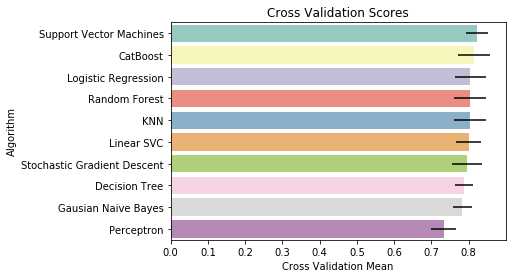

In [111]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

## 6.3.3 Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [112]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.757, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.778, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.716, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.739, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.814, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.818, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.784, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.761, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.818, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.718, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.830, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.802, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.807, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.784, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.750, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.795, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.701, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.790, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.750, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.830, total=   0.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   13.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [113]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [114]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [115]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

Our mean cross validation score improved slightly.

In [116]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
len(Y_pred)

418

# 7. Preparing data for submission

In [118]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [119]:
ss.shape

(418, 2)

We want our submission dataframe to have 418 rows and 2 columns, PassengerId and Survived. 

In [120]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [121]:
submit.shape

(418, 2)

Our dataframe is ready for submission!

In [122]:
# Create and save csv file 

submit.to_csv("C:/Users/Jason Chong/Documents/Kaggle/titanic/svm_titanic.csv", index = False)

# 8. Possible extensions to improve model accuracy

1. Analyse ticket and cabin features
    - Do these features help predict passenger survival?
    - If yes, consider including them in the training set instead of dropping
2. Come up with alternative features in feature engineering
    - Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
    - Does removing features help reduce overfitting in the model?
4. Ensemble modelling
    - This is a more advanced technique whereby you combine prediction results from multiple machine learning models

# 9. Conclusion

You should achieve a submission score of 0.77511 if you follow exactly what I have done in this notebook. In other words, I have correctly predicted 77.5% of the test set. I highly encourage you to work through this project again and see if you can improve on this result.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. Let's help each other get better - happy learning!

My platforms: 
- [Facebook](https://www.facebook.com/chongjason914)
- [Instagram](https://www.instagram.com/chongjason914)
- [Twitter](https://www.twitter.com/chongjason914)
- [LinkedIn](https://www.linkedin.com/in/chongjason914)
- [YouTube](https://www.youtube.com/channel/UCQXiCnjatxiAKgWjoUlM-Xg?view_as=subscriber)
- [Medium](https://www.medium.com/@chongjason)